# EDA

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import openpyxl
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve

In [2]:
import sys

# sys.path.insert(0, '../modules')

from modules.hrd import HRD

In [3]:
sys.path

['/mnt/d/skola/Bakalarka/workspace',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages',
 '/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/IPython/extensions',
 '/home/martin/.ipython']

In [4]:
def find_outliers(data, column_name):
    column_data = data.loc[:, column_name]
    lower_bound = column_data.quantile(0.25) - 1.5 * stats.iqr(column_data)
    upper_bound = column_data.quantile(0.75) + 1.5 * stats.iqr(column_data)
    
    return data[(column_data > upper_bound) | (column_data < lower_bound)]

In [5]:
def get_quantile(data, column, quantile):
    percentile = np.percentile(data[column], quantile*100)
    
    return data.loc[ data[column] >= percentile ]

## Space & Time dataset

In [6]:
seg_reports_path_space_and_time = 'datasets/SpaceAndTime/Segmental_reports/'
vcfs_path_space_and_time = 'datasets/SpaceAndTime/VCFs/'

samples_space_and_time = [
    {
        'Segmental report': 'P1.346403.Oxford/P1.346403.WES.10487.LungMET_events.txt',
        'VCF': 'Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.Source.vcf.gz',
        'Sample name': 'P29.346403.10487.MET'
    },
    {
        'Segmental report': 'P1.346403.Oxford/P1.346403.WES.9135.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.Source.vcf.gz',
        'Sample name': 'P29.346403.9135.PRE'
    },
    
    
    
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WES.20538.REC1_events.txt',
        'VCF': None,
        'Sample name': None # P62.631450.22059.NORM ?? zrejme nemá vzorku vo vcf
    },
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WGS.16963.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.Source.vcf.gz',
        'Sample name': 'P62.631450.16963.PRE'
    },
    {
        'Segmental report': 'P2.631450.Oxford/P2.631450.WGS.22427.REC2_events.txt',
        'VCF': 'Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.Source.vcf.gz',
        'Sample name': 'P62.631450.22427.REC2'
    },
    
    
    
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.22726.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.22726.PRE'
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.24678.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.24678.POST'
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.25771.MET1a_events.txt',
        'VCF': None,
        'Sample name': None # P71.668392.24679.POST ?? zrejme nie
    },
    {
        'Segmental report': 'P3.668392.Oxford/P3.668392.WGS.25899.MET2a_events.txt',
        'VCF': 'Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Source.vcf.gz',
        'Sample name': 'P71.668392.25900.MET2' # ?? zrejme ok
    },
    
    
    
    {
        'Segmental report': 'P4.737383.Oxford/P4.737383.WES.27135.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Source.vcf.gz',
        'Sample name': 'P80.737383.27135.POST'
    },
    {
        'Segmental report': 'P4.737383.Oxford/P4.737383.WES.28519.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Source.vcf.gz',
        'Sample name': 'P80.737383.28519.MET2'
    },
    
    
    
    {
        'Segmental report': 'P5/P5.670176.WGS.19835.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P5.670176/P5.670176.WGS.HF.Source.vcf.gz',
        'Sample name': 'P72.670176.19835.PRE'
    },
    {
        'Segmental report': 'P5/P5.670176.WGS.20135.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P5.670176/P5.670176.WGS.HF.Source.vcf.gz',
        'Sample name': 'P72.670176.20135.POST'
    },
    
    
    
    {
        'Segmental report': 'P6.Inform/I062.007.WGS.Pre_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P6.Inform/I062.007.WGS.Tumor_events.txt',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met4'
    },
    {
        'Segmental report': 'P6.Inform/I062.015.WGS.Tumor_events.txt',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met5'
    },
    {
        'Segmental report': 'P6.Inform/I062.022.WGS.Tumor_events.txt',
        'VCF': None,
        'Sample name': None # zatial nemam
    },
    {
        'Segmental report': 'P6.Inform/I062.033.WGS.Tumor_events.txt',
        'Segmental report header': False,
        'Segmental report sample name': 'P6.Rec7',
        'VCF': 'P6/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met7'
    },
    
    
    
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.10208.MET3_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.10208.MET3'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.7026.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.7026.PRE'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.8785.MET1_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.8785.MET1'
    },
    {
        'Segmental report': 'P7.268947/P10.268947.WGS.9064.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P10.268947/P10.268947.WGS.HF.Source.vcf.gz',
        'Sample name': 'P21.268947.9064.MET2'
    },
    
    
    
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.MET_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.8046.MET'
    },
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.7202.PRE' # ?? zrejme OK
    },
    {
        'Segmental report': 'P8.267857/P8.267857.WGS.8046.REC_events.txt',
        'VCF': 'Variants_WGS_HF_P7.267857/P7.267857.WGS.HF.Source.vcf.gz',
        'Sample name': 'P20.267857.8290.REC' # ?? zrejme OK
    },
    
    
    
    {
        'Segmental report': 'P9.563259/P11.563259.WGS.13844.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P11.563259/P11.563259.WGS.HF.Source.vcf.gz',
        'Sample name': 'P.54.563259.13844.PRE'
    },
    {
        'Segmental report': 'P9.563259/P11.563259.WGS.14606.MET_events.txt',
        'VCF': 'Variants_WGS_HF_P11.563259/P11.563259.WGS.HF.Source.vcf.gz',
        'Sample name': 'P.54.563259.14606.MET'
    },
    
    
    
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.19245.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.19245.POST'
    },
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.21013.MET1.1_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.21013.MET1.1'
    },
    {
        'Segmental report': 'P10.660085/P12.660085.WGS.2108.MET2_events.txt',
        'VCF': 'Variants_WGS_HF_P12.660085/P12.660085.WGS.HF.Source.vcf.gz',
        'Sample name': 'P69.660085.21018.MET2' # ?? zrejme ok
    },
    
    
    
    {
        'Segmental report': 'P11.182619/P9.182619.WGS.4290.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P9.182619/P9.182619.WGS.HF.Source.vcf.gz',
        'Sample name': 'P14.182619.4290.PRE'
    },
    {
        'Segmental report': 'P11.182619/P9.182619.WGS.5301.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P9.182619/P9.182619.WGS.HF.Source.vcf.gz',
        'Sample name': 'P14.182619.5301.REC'
    },
    
    
    
    {
        'Segmental report': 'P12.476409/P13.476409.WGS.11123.PRE_events.txt',
        'VCF': 'Variants_WGS_HF_P13.476409/P13.476409.WGS.HF.Source.vcf.gz',
        'Sample name': 'P42.476409.11123.PRE'
    },
    {
        'Segmental report': 'P12.476409/P13.476409.WGS.11259.POST_events.txt',
        'VCF': 'Variants_WGS_HF_P13.476409/P13.476409.WGS.HF.Source.vcf.gz',
        'Sample name': 'P42.476409.11259.POST'
    }
]

In [7]:
def results_to_df(samples):
    results = pd.DataFrame(samples)
    results = pd.concat([results, results['LST'].apply(pd.Series)], axis=1)
    if 'Segmental report header' in results.columns:
        results.drop(columns=['Segmental report header', 'Segmental report sample name'], inplace=True)
        
    results.drop(columns=['LST'], inplace=True)

    return results

In [8]:
def run_hrd(samples, seg_reports_path, vcfs_path):
    for sample in samples:
        print(sample['Segmental report'])
        
        seg_relative_path = seg_reports_path + sample['Segmental report']
        vcf_relative_path = None
        if not sample['VCF'] is None:
            vcf_relative_path = vcfs_path + sample['VCF']

        hrd_test = None
        if 'Segmental report header' in sample and sample['Segmental report header'] == False:
            hrd_test = HRD(seg_relative_path, seg_report_file_with_header=False, seg_report_sample_name=sample['Segmental report sample name'], \
                           vcf_file=vcf_relative_path, vcf_sample_name=sample['Sample name']) 
        else:
            hrd_test = HRD(seg_relative_path, vcf_file=vcf_relative_path, vcf_sample_name=sample['Sample name'])        

        sample['LST'], sample['DNA index'] = hrd_test.test_lst()
        sample['TAI'] = hrd_test.test_tai()
        sample['LOH'] = hrd_test.test_loh()
        
    return results_to_df(samples)

In [ ]:
results_space_and_time = run_hrd(samples_space_and_time[0:2], seg_reports_path_space_and_time, vcfs_path_space_and_time)

results_space_and_time

P1.346403.Oxford/P1.346403.WES.10487.LungMET_events.txt
P1.346403.Oxford/P1.346403.WES.9135.PRE_events.txt


In [9]:
pd.set_option('display.max_columns', 1000)

In [10]:
# results_space_and_time.to_excel("datasets/results/hrd_results_S&T.xlsx")

In [13]:
results_space_and_time = pd.read_excel("datasets/results/hrd_results_S&T.xlsx", index_col=0) 

results_space_and_time

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,113,78,57,43,34,27,23,21,20
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,85,57,43,28,24,22,20,18,15
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,NaN,NaN,1.021656,14,18,126,86,57,51,39,34,24,20,16
3,P2.631450.Oxford/P2.631450.WGS.16963.PRE_event...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.16963.PRE,0.962429,11,14,36,25,19,17,16,10,8,8,6
4,P2.631450.Oxford/P2.631450.WGS.22427.REC2_even...,Variants_WGS_HF_P2.631450/P2.631450.WGS..HF.So...,P62.631450.22427.REC2,0.965883,10,14,43,29,26,21,20,16,14,12,12
5,P3.668392.Oxford/P3.668392.WGS.22726.PRE_event...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.22726.PRE,1.052132,14,15,19,17,14,14,11,10,9,9,8
6,P3.668392.Oxford/P3.668392.WGS.24678.POST_even...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.24678.POST,1.057139,13,16,12,12,12,12,11,10,9,9,9
7,P3.668392.Oxford/P3.668392.WGS.25771.MET1a_eve...,NaN,NaN,1.046373,12,17,9,8,8,8,8,7,7,7,7
8,P3.668392.Oxford/P3.668392.WGS.25899.MET2a_eve...,Variants_WGS_HF_P3.668392/P3.668392.WGS.HF.Sou...,P71.668392.25900.MET2,1.071727,9,12,14,14,14,14,13,12,11,11,11
9,P4.737383.Oxford/P4.737383.WES.27135.POST_even...,Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Sou...,P80.737383.27135.POST,1.049255,12,15,33,22,21,15,14,14,13,10,8


In [14]:
results_space_and_time.describe()

,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1.005648,9.205882,8.235294,57.117647,43.882353,35.823529,29.352941,24.735294,20.647059,17.676471,15.735294,13.823529
std,0.075056,11.674316,5.699861,37.403423,26.858512,19.687668,15.075331,11.526804,9.111705,7.845943,7.166034,6.671834
min,0.836970,0.000000,0.000000,9.000000,7.000000,6.000000,6.000000,3.000000,2.000000,1.000000,1.000000,0.000000
25%,0.971625,4.000000,4.250000,24.750000,21.250000,19.500000,15.250000,14.250000,12.500000,11.000000,10.000000,8.250000
50%,1.019771,6.000000,7.000000,48.000000,39.000000,36.000000,29.000000,25.000000,21.000000,17.000000,14.500000,12.500000
75%,1.048865,10.750000,13.500000,86.500000,63.000000,50.250000,43.000000,36.250000,27.750000,24.000000,21.750000,19.000000
max,1.144981,62.000000,22.000000,126.000000,95.000000,71.000000,57.000000,40.000000,34.000000,31.000000,31.000000,27.000000


## Analýza jednotlivých atribútov

### TAI

In [15]:
results_space_and_time['TAI'].mean()

9.205882352941176

In [16]:
results_space_and_time['TAI'].median()

6.0

In [17]:
results_space_and_time['TAI'].skew()

3.4909365295304613

In [18]:
results_space_and_time['TAI'].kurtosis()

13.737633390075125

<AxesSubplot:xlabel='TAI'>

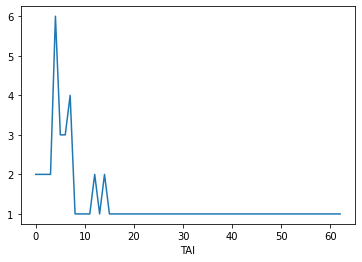

In [19]:
results_space_and_time.groupby('TAI').size().plot()

<AxesSubplot:xlabel='TAI', ylabel='Count'>

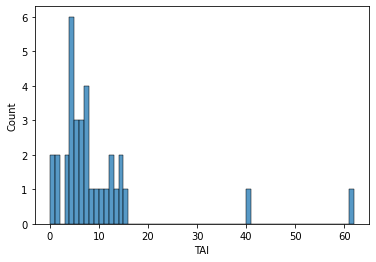

In [20]:
sns.histplot(results_space_and_time['TAI'], binwidth=1)

Môžeme vidieť že distribúcia hodnôt TAI je naklonená doľava, čo hovoria aj miery skewness a kurtosis

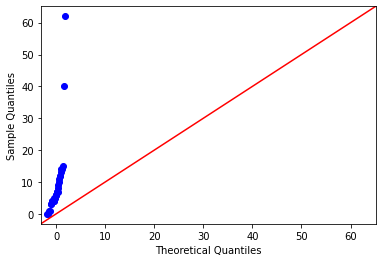

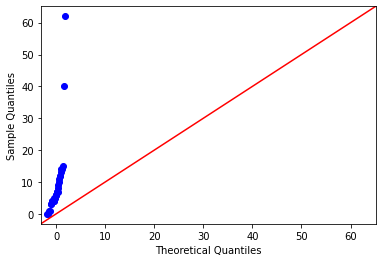

In [21]:
sm.qqplot(results_space_and_time['TAI'], line='45')

Šikmosť smerom vľavo možno vyčítať aj z qq-plotu.

<AxesSubplot:xlabel='TAI'>

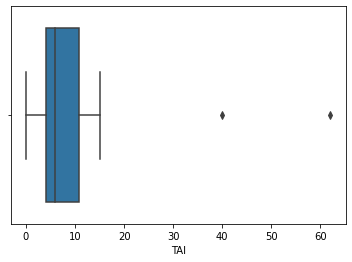

In [22]:
sns.boxplot(x=results_space_and_time['TAI'])

Medzi hodnotami TAI sa nachádzajú 2 veľmi vychýlené hodnoty. Hodnoty sa pohybujú v intervale 0 až cca 15.

In [23]:
find_outliers(results_space_and_time, 'TAI')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,113,78,57,43,34,27,23,21,20
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,85,57,43,28,24,22,20,18,15


Vidíme, že obidva outliere sú vzorky z pacienta 1

### LOH

In [24]:
results_space_and_time['LOH'].mean()

8.235294117647058

In [25]:
results_space_and_time['LOH'].median()

7.0

In [26]:
results_space_and_time['LOH'].skew()

0.6458831534536316

In [27]:
results_space_and_time['LOH'].kurtosis()

-0.5026828453385899

<AxesSubplot:xlabel='LOH'>

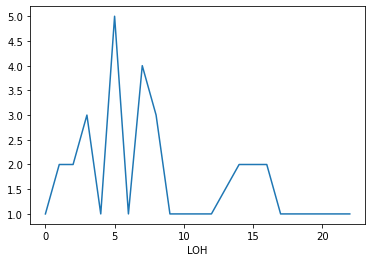

In [28]:
results_space_and_time.groupby('LOH').size().plot()

<AxesSubplot:xlabel='LOH', ylabel='Count'>

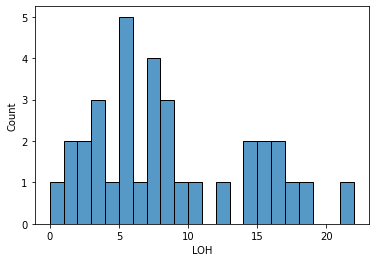

In [29]:
sns.histplot(results_space_and_time['LOH'], binwidth=1)

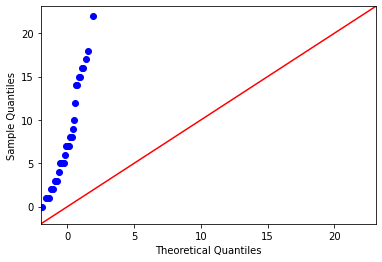

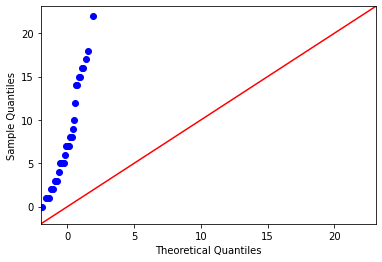

In [30]:
sm.qqplot(results_space_and_time['LOH'], line='45')

<AxesSubplot:xlabel='LOH'>

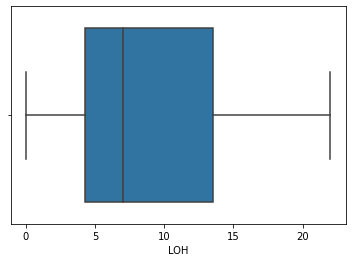

In [31]:
sns.boxplot(x=results_space_and_time['LOH'])

Na grafoch možno vidieť, že LOH nadobúdalo veľmi malé hodnoty väčšinou 0 a 1, iba tri vzorky mali väčšie hodnoty

### LST

#### LST_11Mb

In [32]:
results_space_and_time['LST_11Mb'].mean()

13.823529411764707

In [33]:
results_space_and_time['LST_11Mb'].median()

12.5

In [34]:
results_space_and_time['LST_11Mb'].skew()

0.24759911170946008

In [35]:
results_space_and_time['LST_11Mb'].kurtosis()

-0.5973781688567414

<AxesSubplot:xlabel='LST_11Mb'>

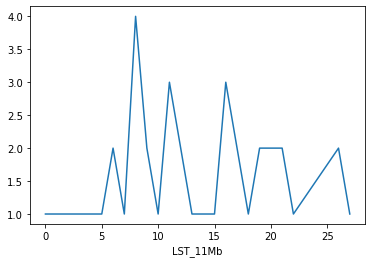

In [36]:
results_space_and_time.groupby('LST_11Mb').size().plot()

<AxesSubplot:xlabel='LST_11Mb', ylabel='Count'>

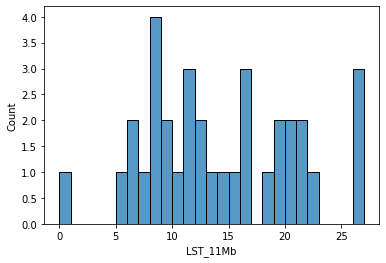

In [37]:
sns.histplot(results_space_and_time['LST_11Mb'], binwidth=1)

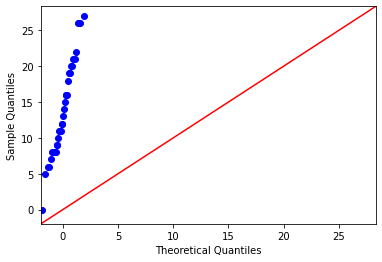

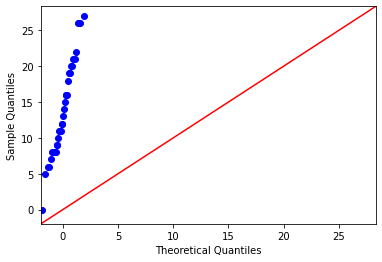

In [38]:
sm.qqplot(results_space_and_time['LST_11Mb'], line='45')

<AxesSubplot:xlabel='LST_11Mb'>

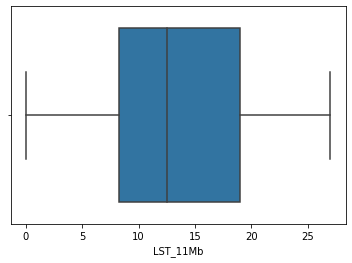

In [39]:
sns.boxplot(x=results_space_and_time['LST_11Mb'])

#### LST_10Mb

In [40]:
results_space_and_time['LST_10Mb'].mean()

15.735294117647058

In [41]:
results_space_and_time['LST_10Mb'].median()

14.5

In [42]:
results_space_and_time['LST_10Mb'].skew()

0.21780377398926878

In [43]:
results_space_and_time['LST_10Mb'].kurtosis()

-0.6662049973631397

<AxesSubplot:xlabel='LST_10Mb'>

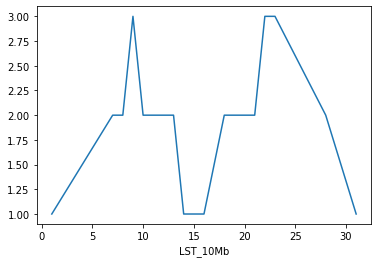

In [44]:
results_space_and_time.groupby('LST_10Mb').size().plot()

<AxesSubplot:xlabel='LST_10Mb', ylabel='Count'>

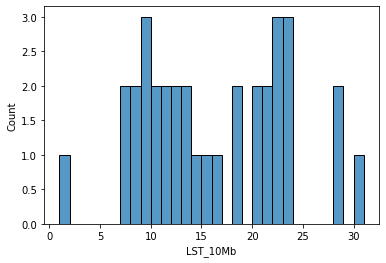

In [45]:
sns.histplot(results_space_and_time['LST_10Mb'], binwidth=1)

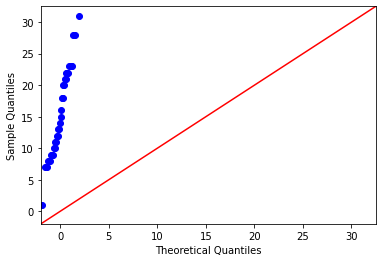

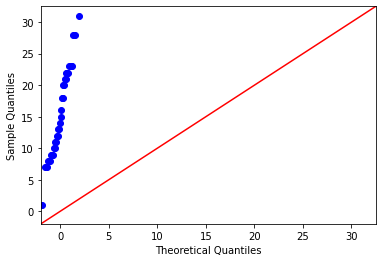

In [46]:
sm.qqplot(results_space_and_time['LST_10Mb'], line='45')

<AxesSubplot:xlabel='LST_10Mb'>

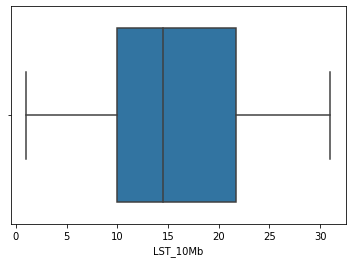

In [47]:
sns.boxplot(x=results_space_and_time['LST_10Mb'])

#### LST 9Mb

In [48]:
results_space_and_time['LST_9Mb'].mean()

17.676470588235293

In [49]:
results_space_and_time['LST_9Mb'].median()

17.0

In [50]:
results_space_and_time['LST_9Mb'].skew()

-0.11360273986475443

In [51]:
results_space_and_time['LST_9Mb'].kurtosis()

-1.0575821777513248

<AxesSubplot:xlabel='LST_9Mb'>

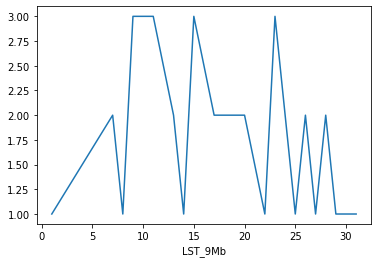

In [52]:
results_space_and_time.groupby('LST_9Mb').size().plot()

<AxesSubplot:xlabel='LST_9Mb', ylabel='Count'>

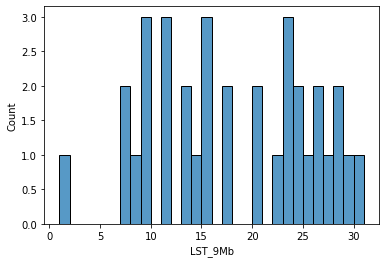

In [53]:
sns.histplot(results_space_and_time['LST_9Mb'], binwidth=1)

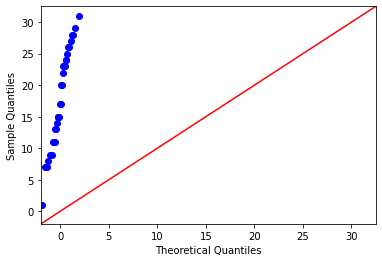

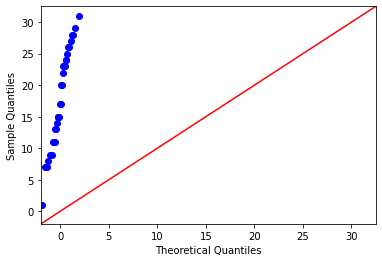

In [54]:
sm.qqplot(results_space_and_time['LST_9Mb'], line='45')

<AxesSubplot:xlabel='LST_9Mb'>

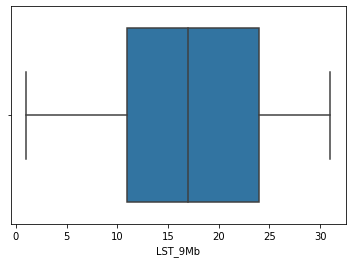

In [55]:
sns.boxplot(x=results_space_and_time['LST_9Mb'])

#### LST 8Mb

In [56]:
results_space_and_time['LST_8Mb'].mean()

20.647058823529413

In [57]:
results_space_and_time['LST_8Mb'].median()

21.0

In [58]:
results_space_and_time['LST_8Mb'].skew()

-0.1336248607587611

In [59]:
results_space_and_time['LST_8Mb'].kurtosis()

-1.1392604706510725

<AxesSubplot:xlabel='LST_8Mb'>

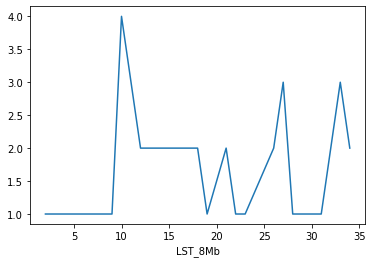

In [60]:
results_space_and_time.groupby('LST_8Mb').size().plot()

<AxesSubplot:xlabel='LST_8Mb', ylabel='Count'>

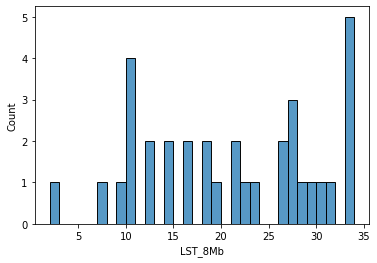

In [61]:
sns.histplot(results_space_and_time['LST_8Mb'], binwidth=1)

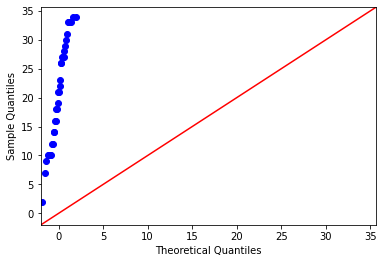

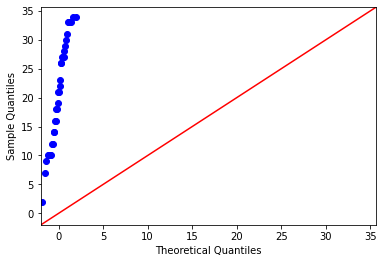

In [62]:
sm.qqplot(results_space_and_time['LST_8Mb'], line='45')

<AxesSubplot:xlabel='LST_8Mb'>

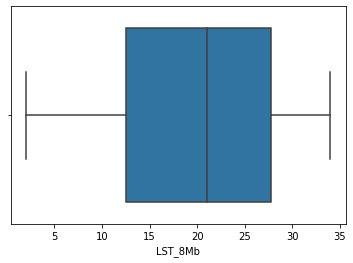

In [63]:
sns.boxplot(x=results_space_and_time['LST_8Mb'])

#### LST 7Mb

In [64]:
results_space_and_time['LST_7Mb'].mean()

24.735294117647058

In [65]:
results_space_and_time['LST_7Mb'].median()

25.0

In [66]:
results_space_and_time['LST_7Mb'].skew()

-0.09713465506858883

In [67]:
results_space_and_time['LST_7Mb'].kurtosis()

-1.4149848485338956

<AxesSubplot:xlabel='LST_7Mb'>

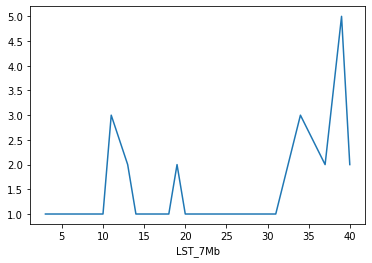

In [68]:
results_space_and_time.groupby('LST_7Mb').size().plot()

<AxesSubplot:xlabel='LST_7Mb', ylabel='Count'>

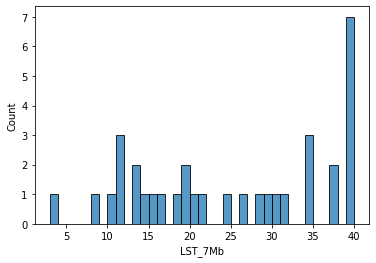

In [69]:
sns.histplot(results_space_and_time['LST_7Mb'], binwidth=1)

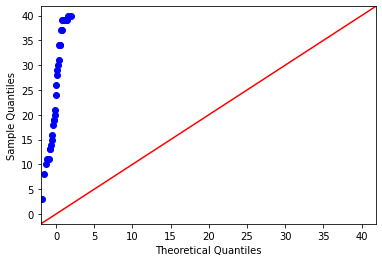

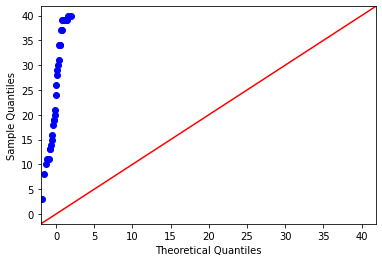

In [70]:
sm.qqplot(results_space_and_time['LST_7Mb'], line='45')

<AxesSubplot:xlabel='LST_7Mb'>

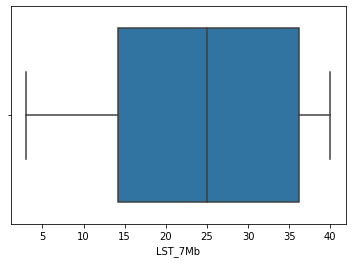

In [71]:
sns.boxplot(x=results_space_and_time['LST_7Mb'])

#### LST 6Mb

In [72]:
results_space_and_time['LST_6Mb'].mean()

29.352941176470587

In [73]:
results_space_and_time['LST_6Mb'].median()

29.0

In [74]:
results_space_and_time['LST_6Mb'].skew()

0.14672931309504472

In [75]:
results_space_and_time['LST_6Mb'].kurtosis()

-1.4121088834686204

<AxesSubplot:xlabel='LST_6Mb'>

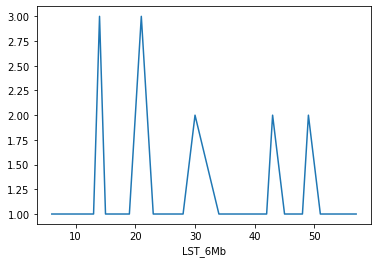

In [76]:
results_space_and_time.groupby('LST_6Mb').size().plot()

<AxesSubplot:xlabel='LST_6Mb', ylabel='Count'>

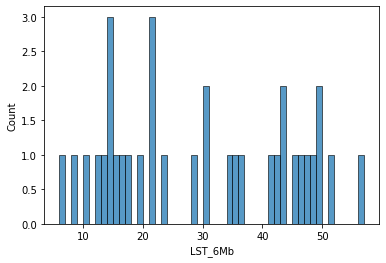

In [77]:
sns.histplot(results_space_and_time['LST_6Mb'], binwidth=1)

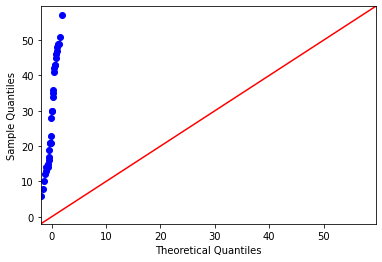

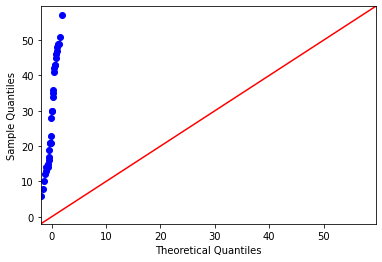

In [78]:
sm.qqplot(results_space_and_time['LST_6Mb'], line='45')

<AxesSubplot:xlabel='LST_6Mb'>

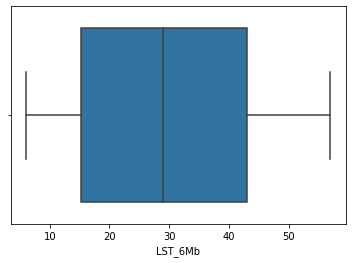

In [79]:
sns.boxplot(x=results_space_and_time['LST_6Mb'])

#### LST 5Mb

In [80]:
results_space_and_time['LST_5Mb'].mean()

35.8235294117647

In [81]:
results_space_and_time['LST_5Mb'].median()

36.0

In [82]:
results_space_and_time['LST_5Mb'].skew()

0.24982786205150567

In [83]:
results_space_and_time['LST_5Mb'].kurtosis()

-1.1778886417677388

<AxesSubplot:xlabel='LST_5Mb'>

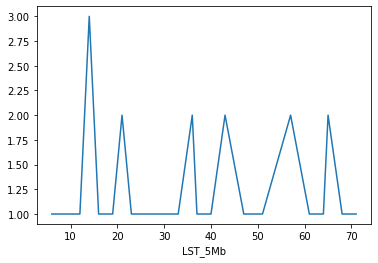

In [84]:
results_space_and_time.groupby('LST_5Mb').size().plot()

<AxesSubplot:xlabel='LST_5Mb', ylabel='Count'>

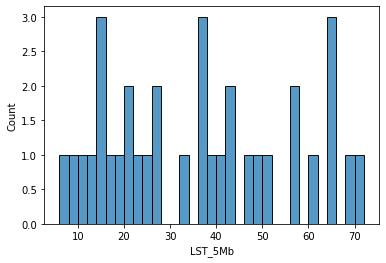

In [85]:
sns.histplot(results_space_and_time['LST_5Mb'], binwidth=2)

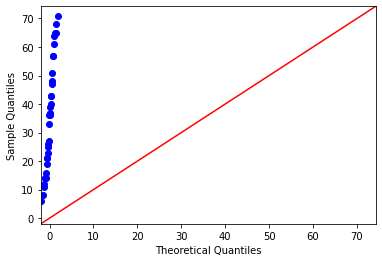

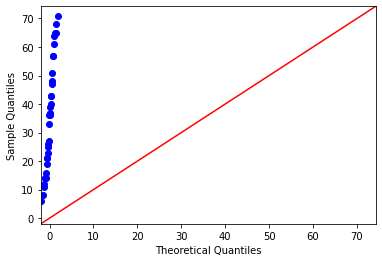

In [86]:
sm.qqplot(results_space_and_time['LST_5Mb'], line='45')

<AxesSubplot:xlabel='LST_5Mb'>

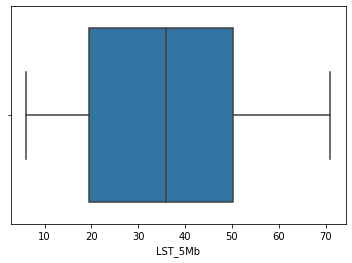

In [87]:
sns.boxplot(x=results_space_and_time['LST_5Mb'])

#### LST 4Mb

In [88]:
results_space_and_time['LST_4Mb'].mean()

43.88235294117647

In [89]:
results_space_and_time['LST_4Mb'].median()

39.0

In [90]:
results_space_and_time['LST_4Mb'].skew()

0.4254712192049522

In [91]:
results_space_and_time['LST_4Mb'].kurtosis()

-1.1047279295815406

<AxesSubplot:xlabel='LST_4Mb'>

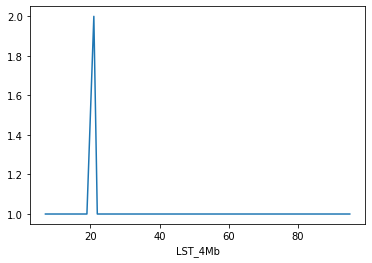

In [92]:
results_space_and_time.groupby('LST_4Mb').size().plot()

<AxesSubplot:xlabel='LST_4Mb', ylabel='Count'>

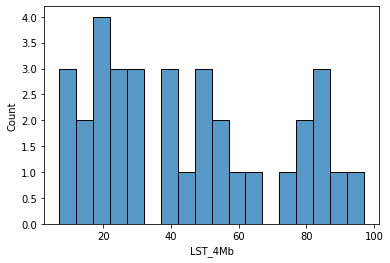

In [93]:
sns.histplot(results_space_and_time['LST_4Mb'], binwidth=5)

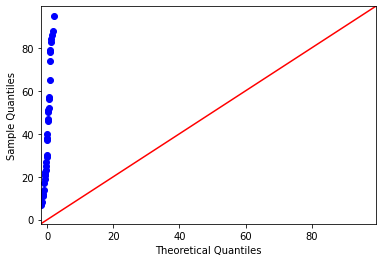

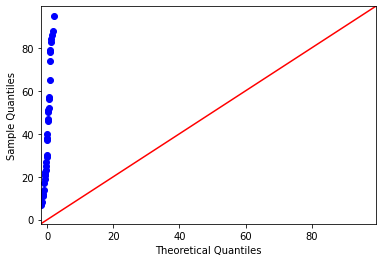

In [94]:
sm.qqplot(results_space_and_time['LST_4Mb'], line='45')

<AxesSubplot:xlabel='LST_4Mb'>

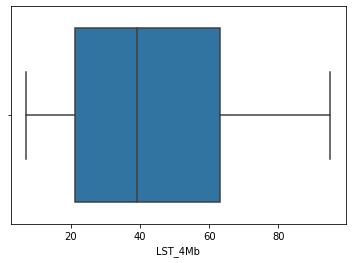

In [95]:
sns.boxplot(x=results_space_and_time['LST_4Mb'])

#### LST 3Mb

In [96]:
results_space_and_time['LST_3Mb'].mean()

57.11764705882353

In [97]:
results_space_and_time['LST_3Mb'].median()

48.0

In [98]:
results_space_and_time['LST_3Mb'].skew()

0.5178450794527878

In [99]:
results_space_and_time['LST_3Mb'].kurtosis()

-1.0061672297030428

<AxesSubplot:xlabel='LST_3Mb'>

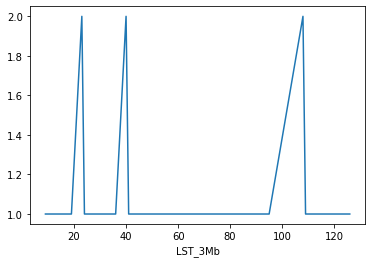

In [100]:
results_space_and_time.groupby('LST_3Mb').size().plot()

<AxesSubplot:xlabel='LST_3Mb', ylabel='Count'>

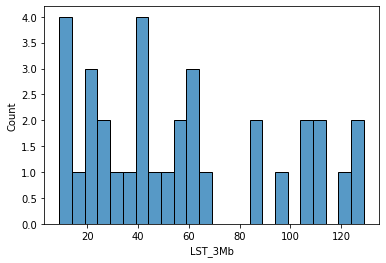

In [101]:
sns.histplot(results_space_and_time['LST_3Mb'], binwidth=5)

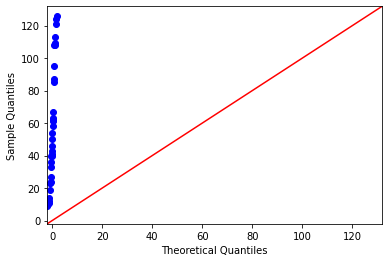

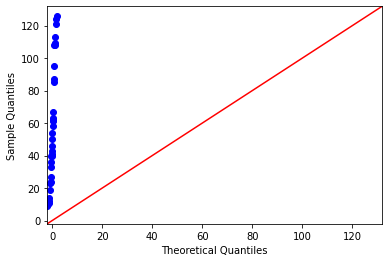

In [102]:
sm.qqplot(results_space_and_time['LST_3Mb'], line='45')

<AxesSubplot:xlabel='LST_3Mb'>

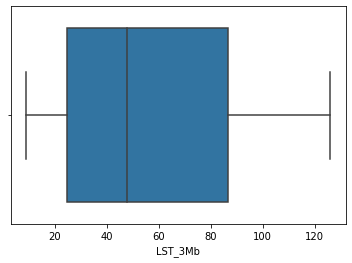

In [103]:
sns.boxplot(x=results_space_and_time['LST_3Mb'])

### HRD

#### HRD s LST_11Mb

In [104]:
results_space_and_time['HRD_11'] = results_space_and_time['TAI'] + results_space_and_time['LOH'] + results_space_and_time['LST_11Mb']

In [105]:
results_space_and_time['HRD_11'].mean()

31.264705882352942

In [106]:
results_space_and_time['HRD_11'].median()

29.0

In [107]:
results_space_and_time['HRD_11'].skew()

1.9678333737619083

In [108]:
results_space_and_time['HRD_11'].kurtosis()

5.897030165365695

<AxesSubplot:xlabel='HRD_11'>

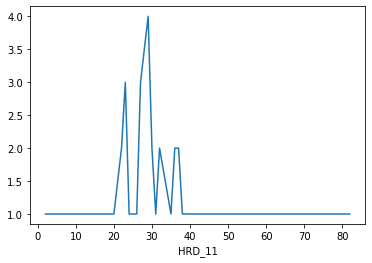

In [109]:
results_space_and_time.groupby('HRD_11').size().plot()

<AxesSubplot:xlabel='HRD_11', ylabel='Count'>

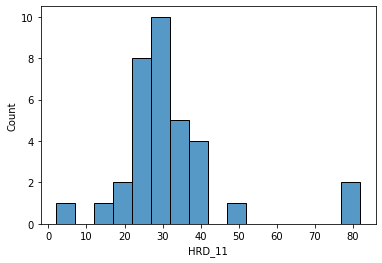

In [110]:
sns.histplot(results_space_and_time['HRD_11'], binwidth=5)

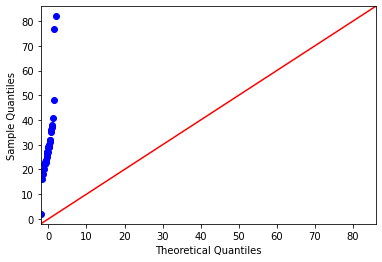

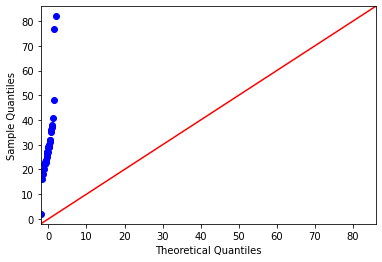

In [111]:
sm.qqplot(results_space_and_time['HRD_11'], line='45')

<AxesSubplot:xlabel='HRD_11'>

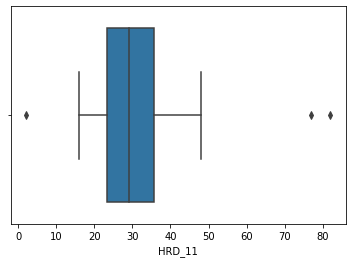

In [112]:
sns.boxplot(x=results_space_and_time['HRD_11'])

In [113]:
find_outliers(results_space_and_time, 'HRD_11')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,113,78,57,43,34,27,23,21,20,82
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,85,57,43,28,24,22,20,18,15,77
13,P6.Inform/I062.007.WGS.Pre_events.txt,NaN,NaN,0.986621,0,2,10,7,6,6,3,2,1,1,0,2


Outliere z pacienta 1 - vysoké hodnoty TAI

#### HRD s LST_10Mb

In [114]:
results_space_and_time['HRD_10'] = results_space_and_time['TAI'] + results_space_and_time['LOH'] + results_space_and_time['LST_10Mb']

In [115]:
results_space_and_time['HRD_10'].mean()

33.1764705882353

In [116]:
results_space_and_time['HRD_10'].median()

31.5

In [117]:
results_space_and_time['HRD_10'].skew()

1.9251272047048131

In [118]:
results_space_and_time['HRD_10'].kurtosis()

5.746836906284257

<AxesSubplot:xlabel='HRD_10'>

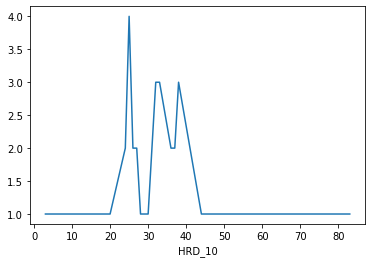

In [119]:
results_space_and_time.groupby('HRD_10').size().plot()

<AxesSubplot:xlabel='HRD_10', ylabel='Count'>

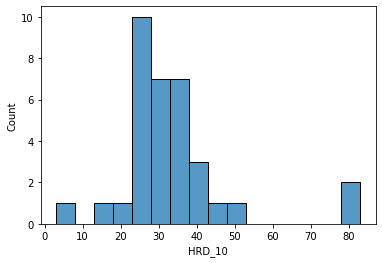

In [120]:
sns.histplot(results_space_and_time['HRD_10'], binwidth=5)

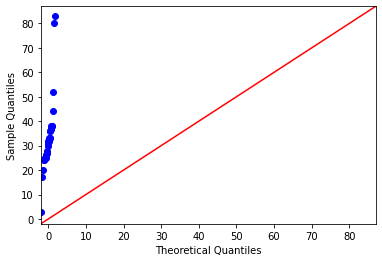

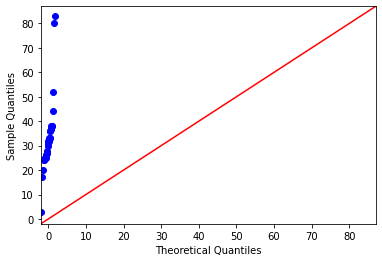

In [121]:
sm.qqplot(results_space_and_time['HRD_10'], line='45')

<AxesSubplot:xlabel='HRD_10'>

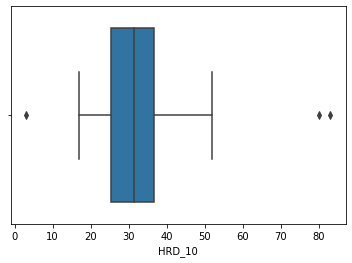

In [122]:
sns.boxplot(x=results_space_and_time['HRD_10'])

In [123]:
find_outliers(results_space_and_time, 'HRD_10')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,113,78,57,43,34,27,23,21,20,82,83
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,85,57,43,28,24,22,20,18,15,77,80
13,P6.Inform/I062.007.WGS.Pre_events.txt,NaN,NaN,0.986621,0,2,10,7,6,6,3,2,1,1,0,2,3


#### HRD s LST_9Mb

In [124]:
results_space_and_time['HRD_9'] = results_space_and_time['TAI'] + results_space_and_time['LOH'] + results_space_and_time['LST_9Mb']

In [125]:
results_space_and_time['HRD_9'].mean()

35.11764705882353

In [126]:
results_space_and_time['HRD_9'].median()

33.0

In [127]:
results_space_and_time['HRD_9'].skew()

1.7722877214222053

In [128]:
results_space_and_time['HRD_9'].kurtosis()

5.299121347031294

<AxesSubplot:xlabel='HRD_9'>

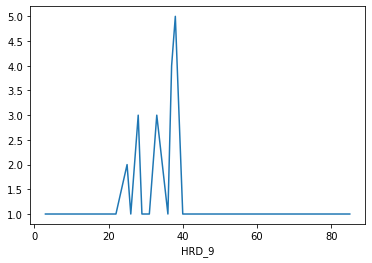

In [129]:
results_space_and_time.groupby('HRD_9').size().plot()

<AxesSubplot:xlabel='HRD_9', ylabel='Count'>

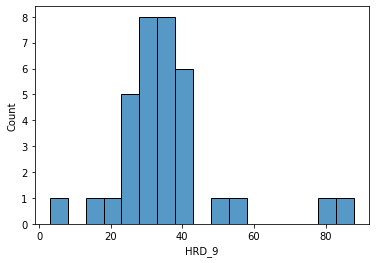

In [130]:
sns.histplot(results_space_and_time['HRD_9'], binwidth=5)

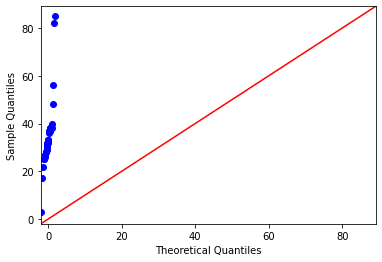

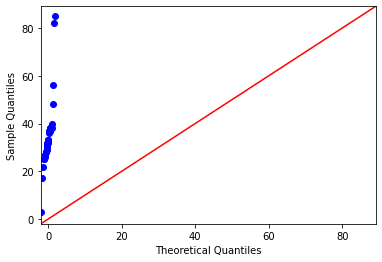

In [131]:
sm.qqplot(results_space_and_time['HRD_9'], line='45')

<AxesSubplot:xlabel='HRD_9'>

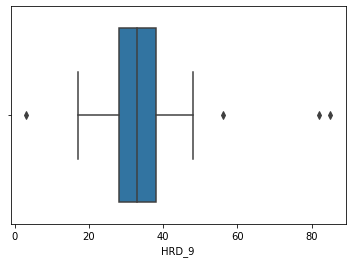

In [132]:
sns.boxplot(x=results_space_and_time['HRD_9'])

In [133]:
find_outliers(results_space_and_time, 'HRD_9')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,113,78,57,43,34,27,23,21,20,82,83,85
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,85,57,43,28,24,22,20,18,15,77,80,82
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,NaN,NaN,1.021656,14,18,126,86,57,51,39,34,24,20,16,48,52,56
13,P6.Inform/I062.007.WGS.Pre_events.txt,NaN,NaN,0.986621,0,2,10,7,6,6,3,2,1,1,0,2,3,3


#### HRD s LST_8Mb

In [134]:
results_space_and_time['HRD_8'] = results_space_and_time['TAI'] + results_space_and_time['LOH'] + results_space_and_time['LST_8Mb']

In [135]:
results_space_and_time['HRD_8'].mean()

38.088235294117645

In [136]:
results_space_and_time['HRD_8'].median()

36.0

In [137]:
results_space_and_time['HRD_8'].skew()

1.672122717338407

In [138]:
results_space_and_time['HRD_8'].kurtosis()

4.850185357271593

<AxesSubplot:xlabel='HRD_8'>

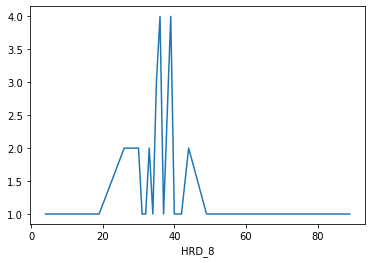

In [139]:
results_space_and_time.groupby('HRD_8').size().plot()

<AxesSubplot:xlabel='HRD_8', ylabel='Count'>

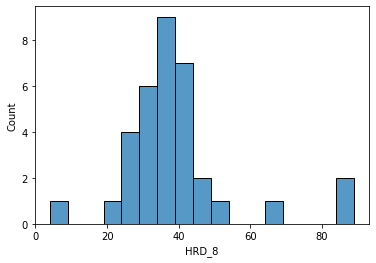

In [140]:
sns.histplot(results_space_and_time['HRD_8'], binwidth=5)

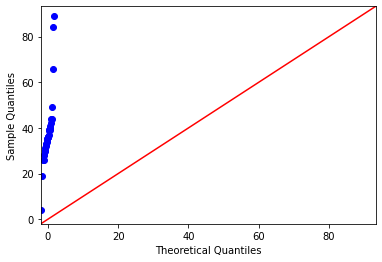

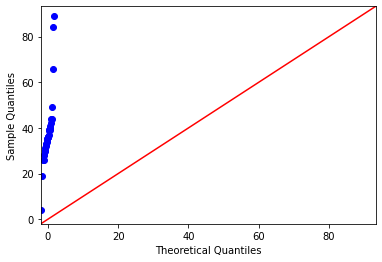

In [141]:
sm.qqplot(results_space_and_time['HRD_8'], line='45')

<AxesSubplot:xlabel='HRD_8'>

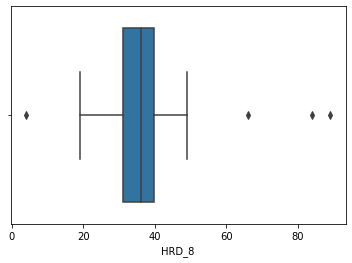

In [142]:
sns.boxplot(x=results_space_and_time['HRD_8'])

In [143]:
find_outliers(results_space_and_time, 'HRD_8')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,113,78,57,43,34,27,23,21,20,82,83,85,89
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,85,57,43,28,24,22,20,18,15,77,80,82,84
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,NaN,NaN,1.021656,14,18,126,86,57,51,39,34,24,20,16,48,52,56,66
13,P6.Inform/I062.007.WGS.Pre_events.txt,NaN,NaN,0.986621,0,2,10,7,6,6,3,2,1,1,0,2,3,3,4


### Párová analýza atribútov

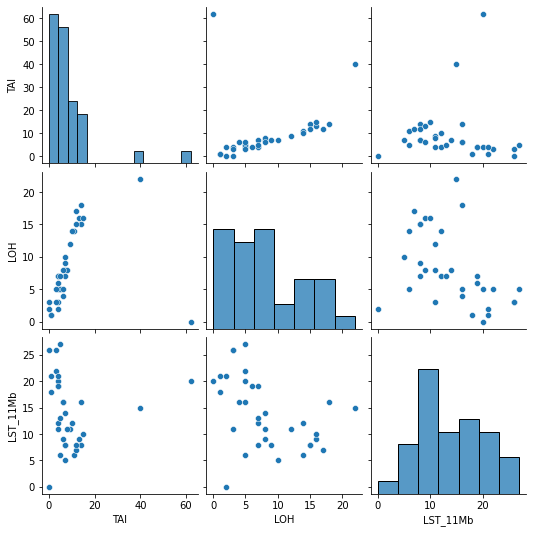

In [144]:
sns.pairplot(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_11Mb']])

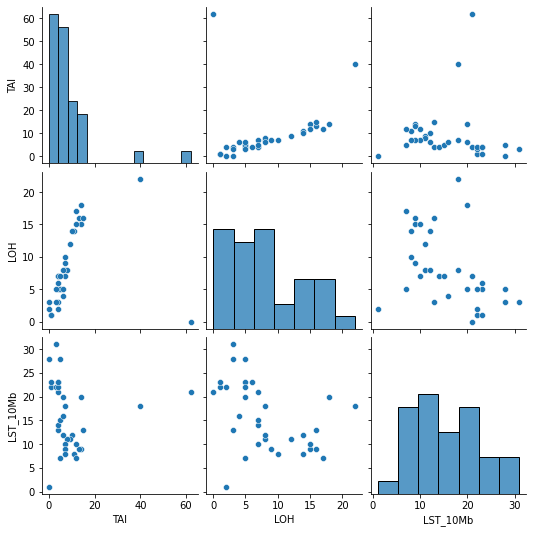

In [145]:
sns.pairplot(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_10Mb']])

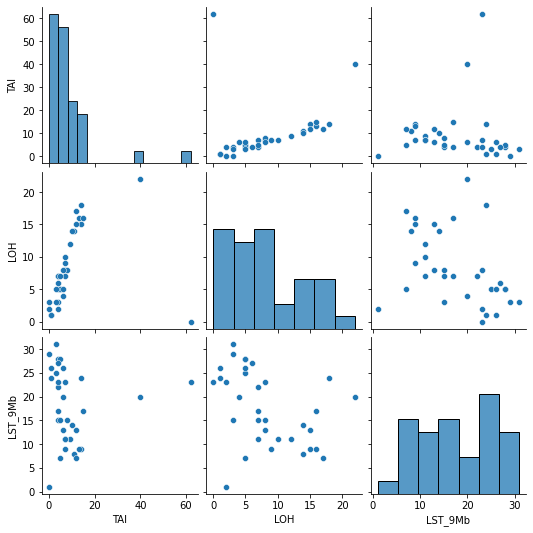

In [146]:
sns.pairplot(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_9Mb']])

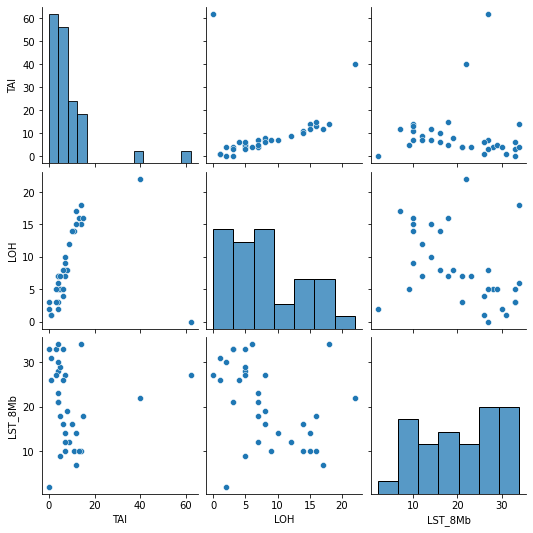

In [147]:
sns.pairplot(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_8Mb']])

<AxesSubplot:>

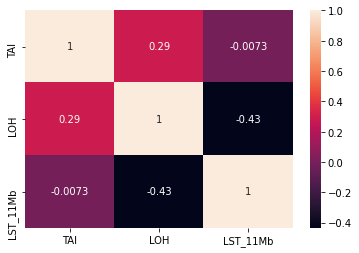

In [148]:
sns.heatmap(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_11Mb']].corr(), annot=True)

<AxesSubplot:>

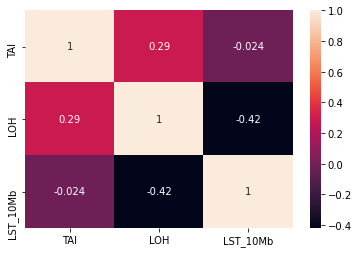

In [149]:
sns.heatmap(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_10Mb']].corr(), annot=True)

<AxesSubplot:>

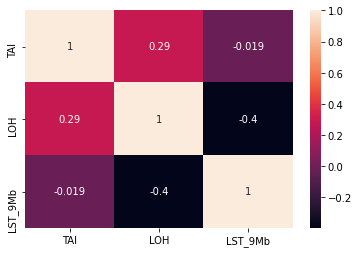

In [150]:
sns.heatmap(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_9Mb']].corr(), annot=True)

<AxesSubplot:>

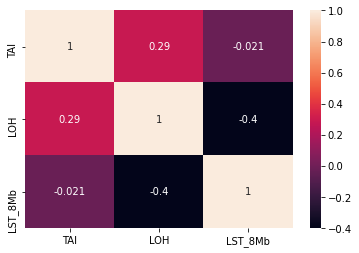

In [151]:
sns.heatmap(results_space_and_time.loc[:, ['TAI', 'LOH', 'LST_8Mb']].corr(), annot=True)

### 10% najvyšších

In [152]:
np.percentile(results_space_and_time['HRD_11'], 90)

40.099999999999994

In [155]:
space_and_time_top_10 = get_quantile(results_space_and_time, 'HRD_11', 0.9)

space_and_time_top_10

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8
0,P1.346403.Oxford/P1.346403.WES.10487.LungMET_e...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.10487.MET,0.995681,62,0,113,78,57,43,34,27,23,21,20,82,83,85,89
1,P1.346403.Oxford/P1.346403.WES.9135.PRE_events...,Variants_WGS_HF_P1.346403/P1.346403.WGS..HF.So...,P29.346403.9135.PRE,1.042693,40,22,85,57,43,28,24,22,20,18,15,77,80,82,84
2,P2.631450.Oxford/P2.631450.WES.20538.REC1_even...,NaN,NaN,1.021656,14,18,126,86,57,51,39,34,24,20,16,48,52,56,66
10,P4.737383.Oxford/P4.737383.WES.28519.MET2_even...,Variants_WGS_HF_P4.737383/P4.737383.WGS.HF.Sou...,P80.737383.28519.MET2,1.017886,15,16,40,27,25,19,19,18,17,13,10,41,44,48,49


## INFORM dataset

In [156]:
seg_reports_path_inform = 'datasets/Inform/Segmental reports/'
vcfs_path_inform = 'datasets/Inform/VCFs/'

samples_inform = [
    {
        'Segmental report': 'P01/P1.I042.001.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P01/P1.I062.003.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P02/P2.MS.00F.WGS_events.txt',
        'VCF': 'P02/P02.MS_00F.WGS.Source.vcf.gz',
        'Sample name': 'MS_00F.T'
    },
    
    
    
    {
        'Segmental report': 'P03/P3.I062.007.WGS_events.txt',
        'VCF': 'P03/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met4'
    },
    {
        'Segmental report': 'P03/P3.I062.015.WGS_events.txt',
        'VCF': 'P03/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met5'
    },
    {
        'Segmental report': 'P03/P3.I062.022.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    {
        'Segmental report': 'P03/P3.I062.033.WGS_events.txt',
        'VCF': 'P03/P06.WGS.raw.vcf.gz',
        'Sample name': 'P6.Met7'
    },
    
    
    
    {
        'Segmental report': 'P04/P4.I042.002.WGS_events.txt',
        'VCF': 'P04/P04.I042_002.WGS.Source.vcf.gz',
        'Sample name': 'I042_002.T'
    },
    
    
    
    {
        'Segmental report': 'P05/P5.HA.00B.WGS_events.txt',
        'VCF': 'P05/P05.HA_00B.WGS.Source.vcf.gz',
        'Sample name': 'HA_00B.T'
    },
    
    
    
    {
        'Segmental report': 'P06/P6.HD.00J.WGS_events.txt',
        'VCF': 'P06/P06.HD_00J.WGS.HF.Source.vcf.gz',
        'Sample name': 'HD_00J.T'
    },
    
    
    
    {
        'Segmental report': 'P07/P7.MS.00A.WGS_events.txt',
        'VCF': 'P07/P07.MS_00A.WGS.Source.vcf.gz',
        'Sample name': 'MS_00A.T'
    },
    
    
    
    {
        'Segmental report': 'P08/P8.I022.002.WGS_events.txt',
        'VCF': 'P08/P08.I022_002.WGS.HF.Source.vcf.gz',
        'Sample name': 'I022_002.T'
    },
    
    
    
    {
        'Segmental report': 'P09/P9.I047.003.WGS_events.txt',
        'VCF': 'P09/P09.I047_003.WGS.HF.Source.vcf.gz',
        'Sample name': 'I047_003.T'
    },
    
    
    
    {
        'Segmental report': 'P10/P10.I023.005.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P11/P11.I036.005.WGS_events.txt',
        'VCF': 'P11/P11.I036_005.WGS.HF.Source.vcf.gz',
        'Sample name': 'I036_005.T'
    },
    
    
    
    {
        'Segmental report': 'P12/P12.I056.004.WGS_events.txt',
        'VCF': 'P12/P12.I056_004.WGS.HF.Source.vcf.gz',
        'Sample name': 'I056_004.T'
    },
    
    
    
    {
        'Segmental report': 'P13/P13.I022.017.WGS_events.txt',
        'VCF': 'P13/P13.I022_017.WGS.HF.Source.vcf.gz',
        'Sample name': 'I022_017.T'
    },
    
    
    
    {
        'Segmental report': 'P14/P14.I062.006.WES_events.txt',
        'VCF': 'P14/P14.I062.006.WGS.HF.Source.vcf.gz',
        'Sample name': 'I062.006.T'
    },
    
    
    
    {
        'Segmental report': 'P15/P15.I047.005.WGS_events.txt',
        'VCF': 'P15/P15.I047.005.WGS.raw.vcf.gz',
        'Sample name': 'I047_005.T'
    },
    
    
    
    {
        'Segmental report': 'P16/P16.I062.010.WGS_events.txt',
        'VCF': 'P16/P16.I062_010.WGS.HF.Source.vcf.gz',
        'Sample name': 'I062_010.T'
    },
    
    
    
    {
        'Segmental report': 'P17/P17.I062.020.WGS_events.txt',
        'VCF': 'P17/P17.I062.020.WGS.Source.vcf.gz',
        'Sample name': 'I062_020.T'
    },
    
    
    
    {
        'Segmental report': 'P18/P18.I062_021.WGS_events.txt',
        'VCF': 'P18/P18.I062.021.WGS.Source.vcf.gz',
        'Sample name': 'I0622_021.T'
    },
    
    
    
    {
        'Segmental report': 'P19/P19.I007.018.WGS_events.txt',
        'VCF': 'P19/P19.I007.018.WGS.Source.vcf.gz',
        'Sample name': 'I007_018.T'
    },
    
    
    
    {
        'Segmental report': 'P20/P20.I047.006.WGS_events.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P21/P21.I037.002.WGS_events.txt',
        'VCF': 'P21/P21.I037.002.WGS.Source.vcf.gz',
        'Sample name': 'I037_002_3M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P22/P22.I044.004.WGS_events.txt',
        'VCF': 'P22/P22.I044.004.WGS.Source.vcf.gz',
        'Sample name': 'I044_004_2M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P23/P23.I002.006.WGS_events.txt',
        'VCF': 'P23/P23.I002.006.WGS.Source.vcf.gz',
        'Sample name': 'I002_006_9M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P24/P24.I062.035.WGS_events.txt',
        'VCF': 'P24/P24.I062.035.WGS.Source.vcf.gz',
        'Sample name': 'I062_035_2M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P25/P25.I002.007.WGS_events.txt',
        'VCF': 'P25/P25.I002.007.WGS.HF.Source.vcf.gz',
        'Sample name': 'I002_007_9M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P26/P26.I042.009.WGS_events.txt',
        'VCF': 'P26/P26.I042.009.WGS.Source.vcf.gz',
        'Sample name': 'I042_009_1M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P27/P27.I047.007.WGS_events.txt',
        'VCF': 'P27/P27.I047.007.WGS.Source.vcf.gz',
        'Sample name': 'I047_007_2M1_D1'
    },
    
    
    
    {
        'Segmental report': 'P28/P28.I057.002.WGS_events.txt',
        'VCF': 'P28/P28.I057.002.WGS.HF.Source.vcf.gz',
        'Sample name': 'I057_002_2T1_D1'
    },
    
    
    
    {
        'Segmental report': 'P29/P29.I024.021.WGS.nexus_export.txt',
        'VCF': 'P29/P29.I024.021.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'AS-258811-LR-37678'
    },
    
    
    
    {
        'Segmental report': 'P30/P30.I070.021.WGS.nexus_export.txt',
        'VCF': 'P30/P30.I070.021.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'AS-261727-LR-38150'
    },
    
    
    
    {
        'Segmental report': 'P31/P31.I015.008.WGS.nexus_export.txt',
        'VCF': 'P31/P31.I015.008.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'I015.008.Tumor'
    },
    
    
    
    {
        'Segmental report': 'P32/P32.I027.011.WGS.nexus_export.txt',
        'VCF': 'P32/P32.I027.011.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'I027.011.Tumor'
    },
    
    
    
    {
        'Segmental report': 'P33/P33.I047.011.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    {
        'Segmental report': 'P34/P34.I063.011.WGS.nexus_export.txt',
        'VCF': 'P34/P34.I063.011.WGS.bwa.HF.Source.vcf.gz',
        'Sample name': 'I063.011.Tumor'
    },
    
    
    {
        'Segmental report': 'P35/P35.I013.017.WGS.nexus_export.txt',
        'VCF': 'P35/P35.I013.017.hisat2.WGS.raw.vcf.gz',
        'Sample name': 'P35.I013.017.WGS.T'
    },
    
    
    
    {
        'Segmental report': 'P36/P36.I014.018.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P37/P37.I018.023..WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P38/P38.I063.010.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P39/P39.I054.013.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    
    {
        'Segmental report': 'P40/P40.I076.018.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    },
    
    
    {
        'Segmental report': 'P41/P41.I018.019.WGS.nexus_export.txt',
        'VCF': None,
        'Sample name': None
    }
]

In [157]:
results_inform = run_hrd(samples_inform[0:2], seg_reports_path_inform, vcfs_path_inform)

results_inform

P01/P1.I042.001.WGS_events.txt
P01/P1.I062.003.WGS_events.txt


,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb
0,P01/P1.I042.001.WGS_events.txt,None,None,1.006962,0,0,31,25,21,18,16,14,12,9,4
1,P01/P1.I062.003.WGS_events.txt,None,None,1.030277,0,0,36,26,24,22,21,13,10,7,6


In [158]:
# results_inform['HRD_11'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_11Mb']
# results_inform['HRD_10'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_10Mb']
# results_inform['HRD_9'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_9Mb']
# results_inform['HRD_8'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_8Mb']
# results_inform['HRD_7'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_7Mb']
# results_inform['HRD_6'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_6Mb']
# results_inform['HRD_5'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_5Mb']
# results_inform['HRD_4'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_4Mb']
# results_inform['HRD_3'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_3Mb']

# results_inform

In [159]:
# results_inform.to_excel("datasets/results/hrd_results_inform.xlsx")

In [161]:
results_inform = pd.read_excel("datasets/results/hrd_results_inform.xlsx", index_col=0) 

results_inform

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines
0,P01/P1.I042.001.WGS_events.txt,NaN,NaN,1.006962,0,0,31,25,21,18,16,14,12,9,4,4,9,12,14,16,18,21,25,31,NaN,unknown,negative
1,P01/P1.I062.003.WGS_events.txt,NaN,NaN,1.030277,0,0,36,26,24,22,21,13,10,7,6,6,7,10,13,21,22,24,26,36,NaN,unknown,negative
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.051299,0,0,128,102,77,59,44,35,29,23,17,17,23,29,35,44,59,77,102,128,17.0,unknown,negative
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.023299,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.045612,0,0,91,70,59,45,40,31,29,24,20,20,24,29,31,40,45,59,70,91,19.0,deceased,negative
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060479,0,0,23,14,13,11,11,8,7,7,7,7,7,7,8,11,11,13,14,23,2.0,unknown,negative
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,30,39,47,57,79,NaN,stable,negative


In [162]:
results_inform.describe()

,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,38.000000
mean,1.033406,2.088889,1.511111,82.511111,61.155556,47.155556,37.600000,31.622222,26.422222,21.777778,18.555556,15.822222,19.422222,22.155556,25.377778,30.022222,35.222222,41.20000,50.755556,64.755556,86.111111,17.263158
std,0.062700,7.400314,4.003534,46.741369,32.997903,23.217309,17.775622,14.516901,12.610401,10.350426,8.864012,7.805269,13.761753,14.475615,15.884940,17.631956,18.502935,21.41325,26.390559,36.306871,49.603987,5.107939
min,0.915005,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,7.000000,8.000000,11.000000,11.00000,13.000000,13.000000,14.000000,2.000000
25%,1.000028,0.000000,0.000000,50.000000,40.000000,34.000000,28.000000,26.000000,18.000000,15.000000,13.000000,9.000000,13.000000,15.000000,18.000000,18.000000,26.000000,28.00000,34.000000,40.000000,50.000000,15.000000
50%,1.037760,0.000000,0.000000,79.000000,61.000000,47.000000,39.000000,33.000000,28.000000,23.000000,20.000000,17.000000,18.000000,21.000000,24.000000,28.000000,34.000000,39.00000,48.000000,62.000000,79.000000,17.000000
75%,1.067438,0.000000,1.000000,96.000000,78.000000,60.000000,49.000000,40.000000,33.000000,28.000000,24.000000,21.000000,22.000000,25.000000,29.000000,35.000000,41.000000,51.00000,63.000000,81.000000,98.000000,20.000000
max,1.194626,48.000000,23.000000,180.000000,138.000000,106.000000,91.000000,76.000000,63.000000,46.000000,38.000000,31.000000,95.000000,100.000000,109.000000,118.000000,121.000000,131.00000,149.000000,187.000000,226.000000,29.000000


## Analýza jednotlivých atribútov

In [163]:
results_inform.loc[results_inform['Response - cell lines'] == 'negative', 'Response - cell lines numeric'] = 0
results_inform.loc[results_inform['Response - cell lines'] == 'positive', 'Response - cell lines numeric'] = 1

results_inform.loc[results_inform['Response - real'] == 'deceased', 'Response - real numeric'] = 0
results_inform.loc[results_inform['Response - real'] == 'stable', 'Response - real numeric'] = 1

In [164]:
inform_known_cl_response = results_inform.dropna(subset=['Response - cell lines numeric'])
inform_known_cl_response

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
0,P01/P1.I042.001.WGS_events.txt,NaN,NaN,1.006962,0,0,31,25,21,18,16,14,12,9,4,4,9,12,14,16,18,21,25,31,NaN,unknown,negative,0.0,NaN
1,P01/P1.I062.003.WGS_events.txt,NaN,NaN,1.030277,0,0,36,26,24,22,21,13,10,7,6,6,7,10,13,21,22,24,26,36,NaN,unknown,negative,0.0,NaN
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.051299,0,0,128,102,77,59,44,35,29,23,17,17,23,29,35,44,59,77,102,128,17.0,unknown,negative,0.0,NaN
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.023299,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative,0.0,0.0
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.045612,0,0,91,70,59,45,40,31,29,24,20,20,24,29,31,40,45,59,70,91,19.0,deceased,negative,0.0,0.0
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative,0.0,0.0
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060479,0,0,23,14,13,11,11,8,7,7,7,7,7,7,8,11,11,13,14,23,2.0,unknown,negative,0.0,NaN
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive,1.0,0.0
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,30,39,47,57,79,NaN,stable,negative,0.0,1.0


In [165]:
inform_known_real_response = results_inform.dropna(subset=['Response - real numeric'])
inform_known_real_response

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.023299,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative,0.0,0.0
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.045612,0,0,91,70,59,45,40,31,29,24,20,20,24,29,31,40,45,59,70,91,19.0,deceased,negative,0.0,0.0
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative,0.0,0.0
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive,1.0,0.0
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,30,39,47,57,79,NaN,stable,negative,0.0,1.0
10,P07/P7.MS.00A.WGS_events.txt,P07/P07.MS_00A.WGS.Source.vcf.gz,MS_00A.T,0.967578,0,0,92,72,57,50,44,31,30,28,26,26,28,30,31,44,50,57,72,92,NaN,stable,negative,0.0,1.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,6,6,2,1,1,1,1,1,1,1,0,12,13,13,13,13,13,13,13,14,NaN,deceased,negative,0.0,0.0
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,47,59,75,114,167,14.0,stable,positive,1.0,1.0


### Responses

#### Response - real

<AxesSubplot:>

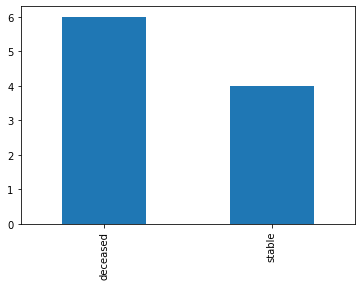

In [166]:
results_inform.loc[results_inform['Response - real'] != 'unknown', 'Response - real'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Response - real'>

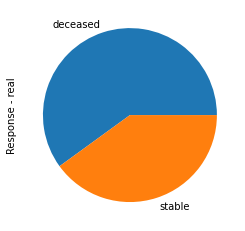

In [167]:
results_inform.loc[results_inform['Response - real'] != 'unknown', 'Response - real'].value_counts().plot(kind='pie')

#### Response - cell lines

<AxesSubplot:>

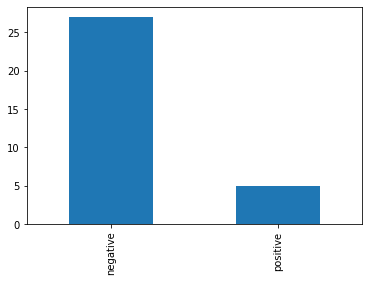

In [168]:
results_inform.loc[results_inform['Response - cell lines'] != 'unknown', 'Response - cell lines'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Response - cell lines'>

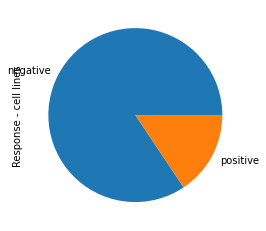

In [169]:
results_inform.loc[results_inform['Response - cell lines'] != 'unknown', 'Response - cell lines'].value_counts().plot(kind='pie')

### Age

In [170]:
results_inform['Age'].mean()

17.263157894736842

In [171]:
results_inform['Age'].median()

17.0

In [172]:
results_inform['Age'].min()

2.0

In [173]:
results_inform['Age'].max()

29.0

### TAI

In [174]:
results_inform['TAI'].mean()

2.088888888888889

In [175]:
results_inform['TAI'].median()

0.0

In [176]:
results_inform['TAI'].var()

54.76464646464649

In [177]:
results_inform['TAI'].skew()

5.7214649359390535

In [178]:
results_inform['TAI'].kurtosis()

35.44809925551186

<AxesSubplot:xlabel='TAI'>

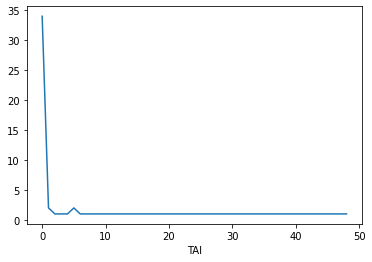

In [179]:
results_inform.groupby('TAI').size().plot()

<AxesSubplot:xlabel='TAI', ylabel='Count'>

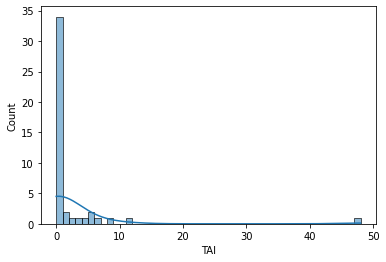

In [180]:
sns.histplot(results_inform['TAI'], binwidth=1, kde=True)

Môžeme vidieť že distribúcia hodnôt TAI je naklonená doľava, čo hovoria aj miery skewness a kurtosis

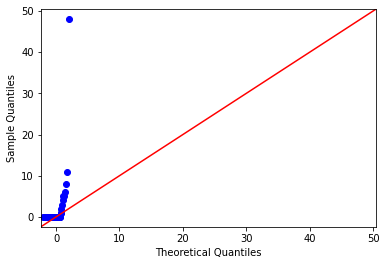

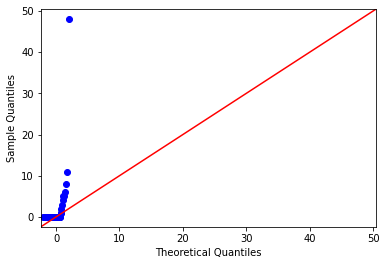

In [181]:
sm.qqplot(results_inform['TAI'], line='45')

Šikmosť smerom vľavo možno vyčítať aj z qq-plotu.

<AxesSubplot:xlabel='TAI'>

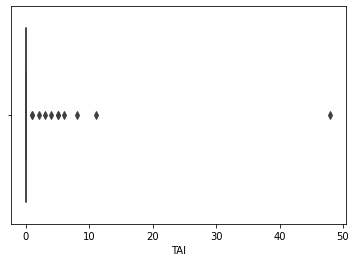

In [182]:
sns.boxplot(x=results_inform['TAI'])

In [183]:
find_outliers(results_inform, 'TAI')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative,0.0,0.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0
22,P19/P19.I007.018.WGS_events.txt,P19/P19.I007.018.WGS.Source.vcf.gz,I007_018.T,0.945868,5,5,7,7,5,4,1,0,0,0,0,10,10,10,10,11,14,15,17,17,16.0,unknown,negative,0.0,NaN
23,P20/P20.I047.006.WGS_events.txt,NaN,NaN,1.003549,8,8,5,4,4,4,3,2,2,2,2,18,18,18,18,19,20,20,20,21,NaN,unknown,negative,0.0,NaN
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,89,72,60,51,43,40,36,33,29,38,42,45,49,52,60,69,81,98,14.0,unknown,positive,1.0,NaN
25,P22/P22.I044.004.WGS_events.txt,P22/P22.I044.004.WGS.Source.vcf.gz,I044_004_2M1_D1,0.990309,4,5,70,55,52,42,36,34,31,26,23,32,35,40,43,45,51,61,64,79,18.0,unknown,negative,0.0,NaN
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,6,6,2,1,1,1,1,1,1,1,0,12,13,13,13,13,13,13,13,14,NaN,deceased,negative,0.0,0.0
28,P25/P25.I002.007.WGS_events.txt,P25/P25.I002.007.WGS.HF.Source.vcf.gz,I002_007_9M1_D1,1.069543,3,3,35,23,16,11,9,8,8,8,7,13,14,14,14,15,17,22,29,41,15.0,unknown,negative,0.0,NaN
29,P26/P26.I042.009.WGS_events.txt,P26/P26.I042.009.WGS.Source.vcf.gz,I042_009_1M1_D1,1.194626,1,1,113,89,64,50,45,33,28,22,20,22,24,30,35,47,52,66,91,115,14.0,unknown,negative,0.0,NaN
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,47,59,75,114,167,14.0,stable,positive,1.0,1.0


### LOH

In [184]:
results_inform['LOH'].mean()

1.511111111111111

In [185]:
results_inform['LOH'].median()

0.0

In [186]:
results_inform['LOH'].var()

16.028282828282823

In [187]:
results_inform['LOH'].skew()

4.035466185528479

In [188]:
results_inform['LOH'].kurtosis()

19.204736233655733

<AxesSubplot:xlabel='LOH'>

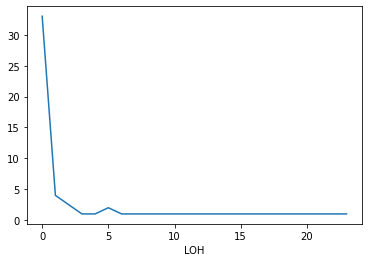

In [189]:
results_inform.groupby('LOH').size().plot()

<AxesSubplot:xlabel='LOH', ylabel='Count'>

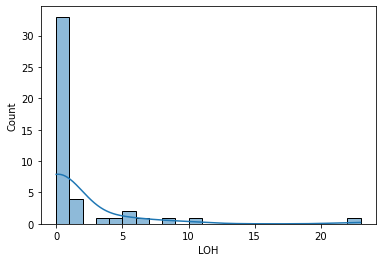

In [190]:
sns.histplot(results_inform['LOH'], binwidth=1, kde=True)

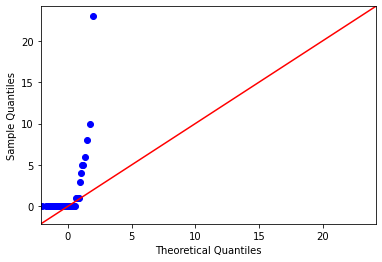

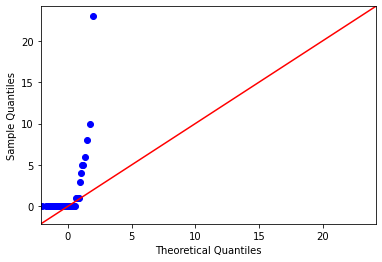

In [191]:
sm.qqplot(results_inform['LOH'], line='45')

<AxesSubplot:xlabel='LOH'>

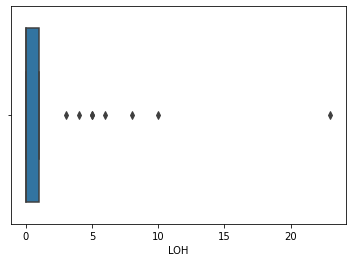

In [192]:
sns.boxplot(x=results_inform['LOH'])

In [193]:
find_outliers(results_inform, 'LOH')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0
22,P19/P19.I007.018.WGS_events.txt,P19/P19.I007.018.WGS.Source.vcf.gz,I007_018.T,0.945868,5,5,7,7,5,4,1,0,0,0,0,10,10,10,10,11,14,15,17,17,16.0,unknown,negative,0.0,NaN
23,P20/P20.I047.006.WGS_events.txt,NaN,NaN,1.003549,8,8,5,4,4,4,3,2,2,2,2,18,18,18,18,19,20,20,20,21,NaN,unknown,negative,0.0,NaN
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,89,72,60,51,43,40,36,33,29,38,42,45,49,52,60,69,81,98,14.0,unknown,positive,1.0,NaN
25,P22/P22.I044.004.WGS_events.txt,P22/P22.I044.004.WGS.Source.vcf.gz,I044_004_2M1_D1,0.990309,4,5,70,55,52,42,36,34,31,26,23,32,35,40,43,45,51,61,64,79,18.0,unknown,negative,0.0,NaN
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,6,6,2,1,1,1,1,1,1,1,0,12,13,13,13,13,13,13,13,14,NaN,deceased,negative,0.0,0.0
28,P25/P25.I002.007.WGS_events.txt,P25/P25.I002.007.WGS.HF.Source.vcf.gz,I002_007_9M1_D1,1.069543,3,3,35,23,16,11,9,8,8,8,7,13,14,14,14,15,17,22,29,41,15.0,unknown,negative,0.0,NaN
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,47,59,75,114,167,14.0,stable,positive,1.0,1.0


### LST

#### LST_11Mb

In [194]:
results_inform['LST_11Mb'].mean()

15.822222222222223

In [195]:
results_inform['LST_11Mb'].median()

17.0

In [196]:
results_inform['LST_11Mb'].var()

60.922222222222224

In [197]:
results_inform['LST_11Mb'].skew()

-0.3463310780144312

In [198]:
results_inform['LST_11Mb'].kurtosis()

-0.5929270691071453

<AxesSubplot:xlabel='LST_11Mb'>

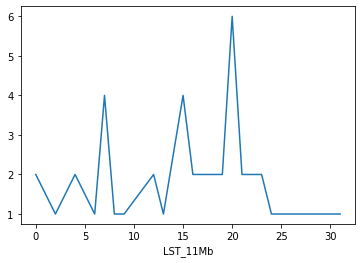

In [199]:
results_inform.groupby('LST_11Mb').size().plot()

<AxesSubplot:xlabel='LST_11Mb', ylabel='Count'>

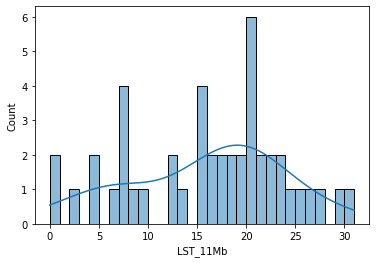

In [200]:
sns.histplot(results_inform['LST_11Mb'], binwidth=1, kde=True)

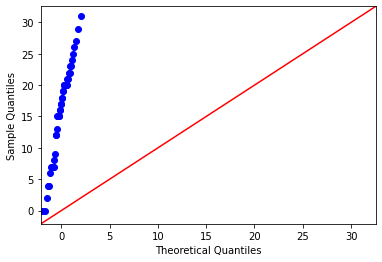

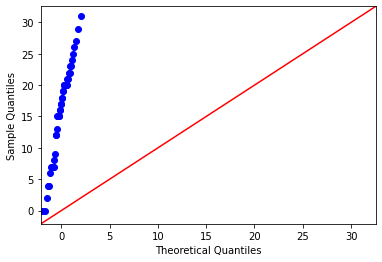

In [201]:
sm.qqplot(results_inform['LST_11Mb'], line='45')

<AxesSubplot:xlabel='LST_11Mb'>

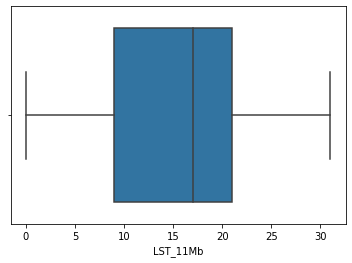

In [202]:
sns.boxplot(x=results_inform['LST_11Mb'])

#### LST_10Mb

In [203]:
results_inform['LST_10Mb'].mean()

18.555555555555557

In [204]:
results_inform['LST_10Mb'].median()

20.0

In [205]:
results_inform['LST_10Mb'].var()

78.57070707070706

In [206]:
results_inform['LST_10Mb'].skew()

-0.16298682717329313

In [207]:
results_inform['LST_10Mb'].kurtosis()

-0.2237005938646539

<AxesSubplot:xlabel='LST_10Mb'>

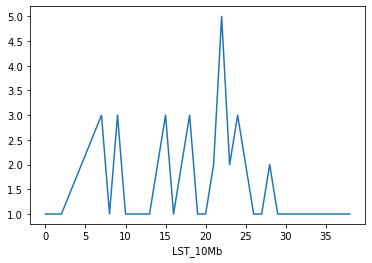

In [208]:
results_inform.groupby('LST_10Mb').size().plot()

<AxesSubplot:xlabel='LST_10Mb', ylabel='Count'>

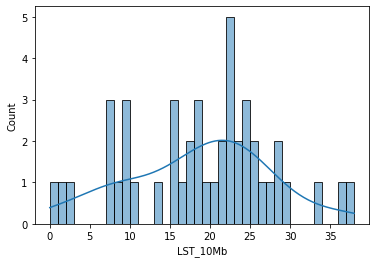

In [209]:
sns.histplot(results_inform['LST_10Mb'], binwidth=1, kde=True)

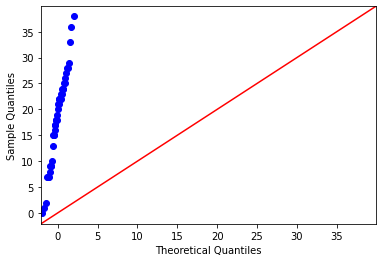

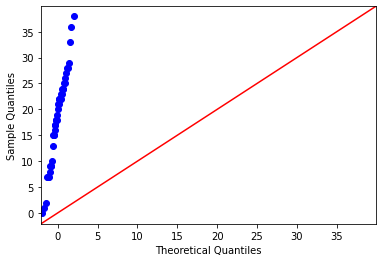

In [210]:
sm.qqplot(results_inform['LST_10Mb'], line='45')

<AxesSubplot:xlabel='LST_10Mb'>

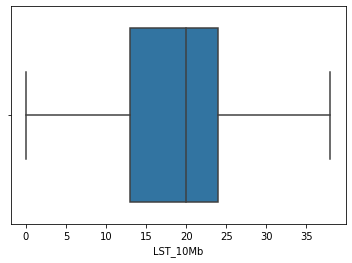

In [211]:
sns.boxplot(x=results_inform['LST_10Mb'])

#### LST 9Mb

In [212]:
results_inform['LST_9Mb'].mean()

21.77777777777778

In [213]:
results_inform['LST_9Mb'].median()

23.0

In [214]:
results_inform['LST_9Mb'].var()

107.13131313131315

In [215]:
results_inform['LST_9Mb'].skew()

-0.17552081846883943

In [216]:
results_inform['LST_9Mb'].kurtosis()

-0.05183755100789522

<AxesSubplot:xlabel='LST_9Mb'>

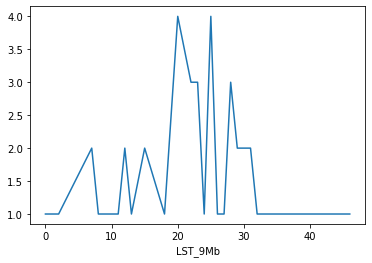

In [217]:
results_inform.groupby('LST_9Mb').size().plot()

<AxesSubplot:xlabel='LST_9Mb', ylabel='Count'>

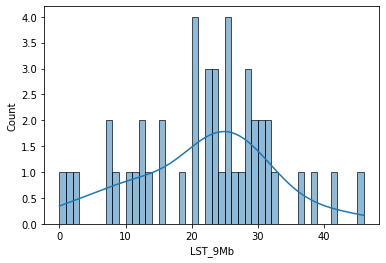

In [218]:
sns.histplot(results_inform['LST_9Mb'], binwidth=1, kde=True)

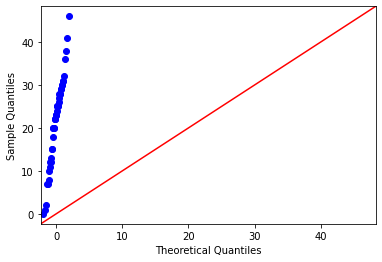

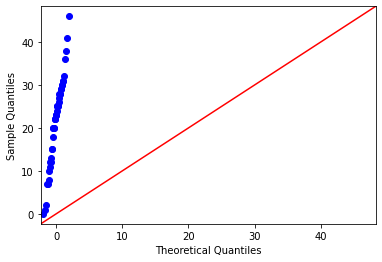

In [219]:
sm.qqplot(results_inform['LST_9Mb'], line='45')

<AxesSubplot:xlabel='LST_9Mb'>

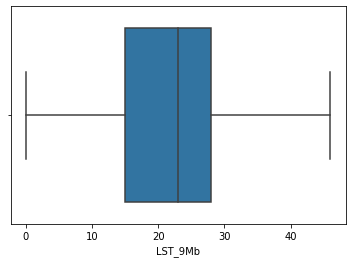

In [220]:
sns.boxplot(x=results_inform['LST_9Mb'])

#### LST 8Mb

In [221]:
results_inform['LST_8Mb'].mean()

26.42222222222222

In [222]:
results_inform['LST_8Mb'].median()

28.0

In [223]:
results_inform['LST_8Mb'].var()

159.0222222222222

In [224]:
results_inform['LST_8Mb'].skew()

0.04792578665327102

In [225]:
results_inform['LST_8Mb'].kurtosis()

0.9130526338839231

<AxesSubplot:xlabel='LST_8Mb'>

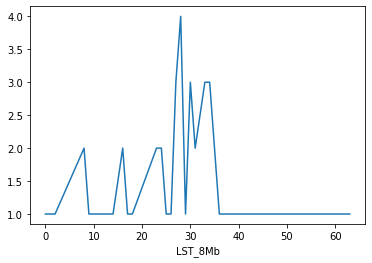

In [226]:
results_inform.groupby('LST_8Mb').size().plot()

<AxesSubplot:xlabel='LST_8Mb', ylabel='Count'>

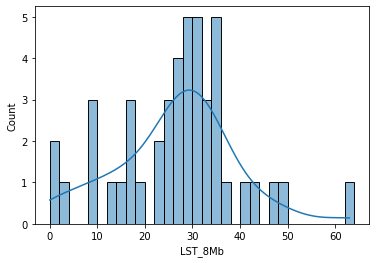

In [227]:
sns.histplot(results_inform['LST_8Mb'], binwidth=2, kde=True)

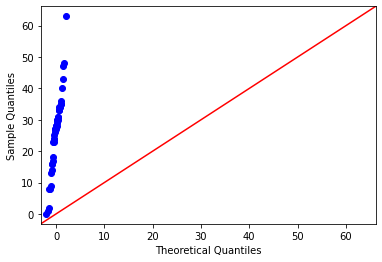

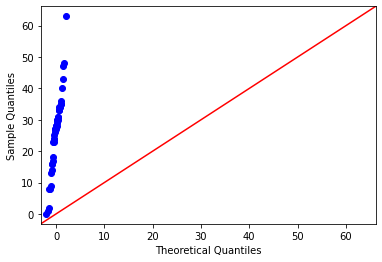

In [228]:
sm.qqplot(results_inform['LST_8Mb'], line='45')

<AxesSubplot:xlabel='LST_8Mb'>

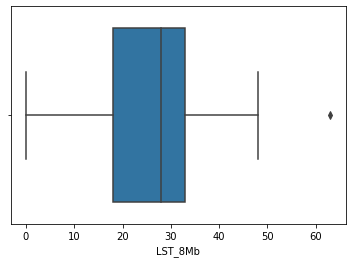

In [229]:
sns.boxplot(x=results_inform['LST_8Mb'])

In [230]:
find_outliers(results_inform, 'LST_8Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0


#### LST 7Mb

In [231]:
results_inform['LST_7Mb'].mean()

31.622222222222224

In [232]:
results_inform['LST_7Mb'].median()

33.0

In [233]:
results_inform['LST_7Mb'].var()

210.74040404040406

In [234]:
results_inform['LST_7Mb'].skew()

0.018288208983137932

In [235]:
results_inform['LST_7Mb'].kurtosis()

1.2452983957963348

<AxesSubplot:xlabel='LST_7Mb'>

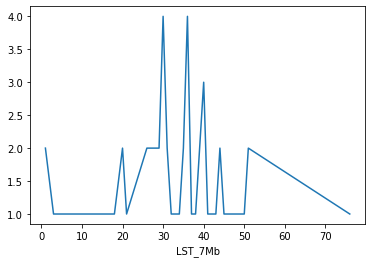

In [236]:
results_inform.groupby('LST_7Mb').size().plot()

<AxesSubplot:xlabel='LST_7Mb', ylabel='Count'>

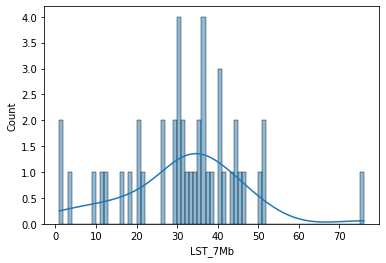

In [237]:
sns.histplot(results_inform['LST_7Mb'], binwidth=1, kde=True)

<AxesSubplot:xlabel='LST_7Mb', ylabel='Count'>

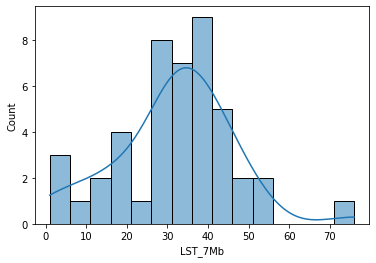

In [238]:
sns.histplot(results_inform['LST_7Mb'], binwidth=5, kde=True)

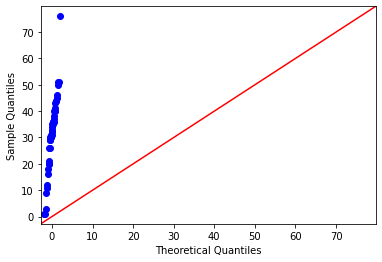

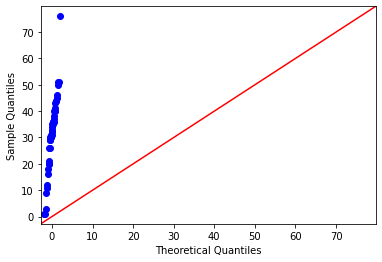

In [239]:
sm.qqplot(results_inform['LST_7Mb'], line='45')

<AxesSubplot:xlabel='LST_7Mb'>

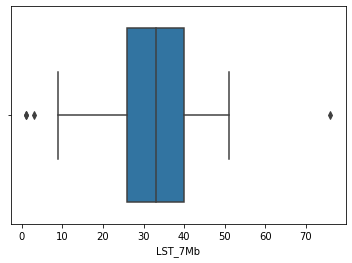

In [240]:
sns.boxplot(x=results_inform['LST_7Mb'])

In [241]:
find_outliers(results_inform, 'LST_7Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
22,P19/P19.I007.018.WGS_events.txt,P19/P19.I007.018.WGS.Source.vcf.gz,I007_018.T,0.945868,5,5,7,7,5,4,1,0,0,0,0,10,10,10,10,11,14,15,17,17,16.0,unknown,negative,0.0,NaN
23,P20/P20.I047.006.WGS_events.txt,NaN,NaN,1.003549,8,8,5,4,4,4,3,2,2,2,2,18,18,18,18,19,20,20,20,21,NaN,unknown,negative,0.0,NaN
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,6,6,2,1,1,1,1,1,1,1,0,12,13,13,13,13,13,13,13,14,NaN,deceased,negative,0.0,0.0


#### LST 6Mb

In [242]:
results_inform['LST_6Mb'].mean()

37.6

In [243]:
results_inform['LST_6Mb'].median()

39.0

In [244]:
results_inform['LST_6Mb'].var()

315.9727272727272

In [245]:
results_inform['LST_6Mb'].skew()

0.11611497561399867

In [246]:
results_inform['LST_6Mb'].kurtosis()

0.8871646939922582

<AxesSubplot:xlabel='LST_6Mb'>

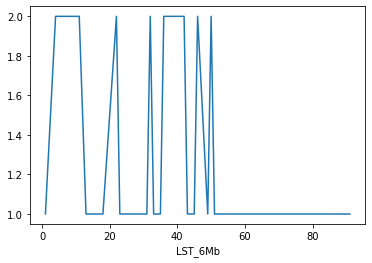

In [247]:
results_inform.groupby('LST_6Mb').size().plot()

<AxesSubplot:xlabel='LST_6Mb', ylabel='Count'>

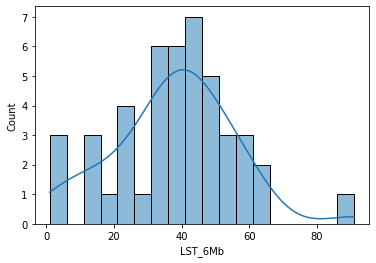

In [248]:
sns.histplot(results_inform['LST_6Mb'], binwidth=5, kde=True)

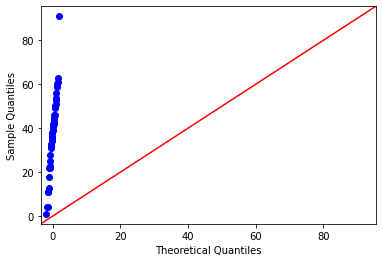

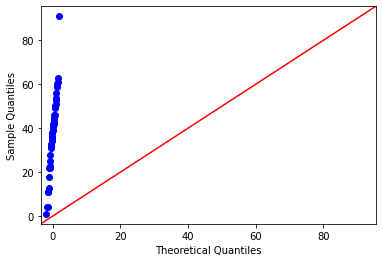

In [249]:
sm.qqplot(results_inform['LST_6Mb'], line='45')

<AxesSubplot:xlabel='LST_6Mb'>

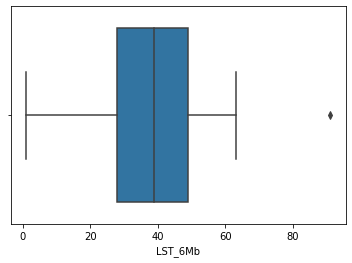

In [250]:
sns.boxplot(x=results_inform['LST_6Mb'])

In [251]:
find_outliers(results_inform, 'LST_6Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0


#### LST 5Mb

In [252]:
results_inform['LST_5Mb'].mean()

47.15555555555556

In [253]:
results_inform['LST_5Mb'].median()

47.0

In [254]:
results_inform['LST_5Mb'].var()

539.0434343434343

In [255]:
results_inform['LST_5Mb'].skew()

0.06276505669327487

In [256]:
results_inform['LST_5Mb'].kurtosis()

-0.0079848147552255

<AxesSubplot:xlabel='LST_5Mb'>

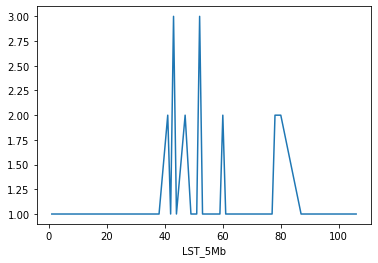

In [257]:
results_inform.groupby('LST_5Mb').size().plot()

<AxesSubplot:xlabel='LST_5Mb', ylabel='Count'>

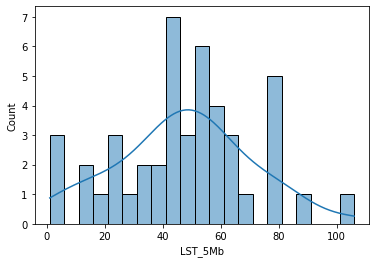

In [258]:
sns.histplot(results_inform['LST_5Mb'], binwidth=5, kde=True)

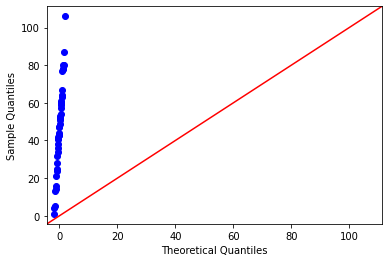

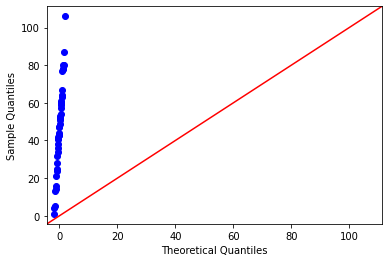

In [259]:
sm.qqplot(results_inform['LST_5Mb'], line='45')

<AxesSubplot:xlabel='LST_5Mb'>

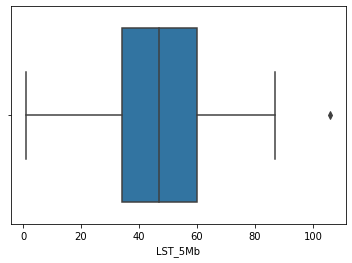

In [260]:
sns.boxplot(x=results_inform['LST_5Mb'])

In [261]:
find_outliers(results_inform, 'LST_5Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0


#### LST 4Mb

In [262]:
results_inform['LST_4Mb'].mean()

61.15555555555556

In [263]:
results_inform['LST_4Mb'].median()

61.0

In [264]:
results_inform['LST_4Mb'].var()

1088.861616161616

In [265]:
results_inform['LST_4Mb'].skew()

0.32403574176831773

In [266]:
results_inform['LST_4Mb'].kurtosis()

-0.2771276330055086

<AxesSubplot:xlabel='LST_4Mb'>

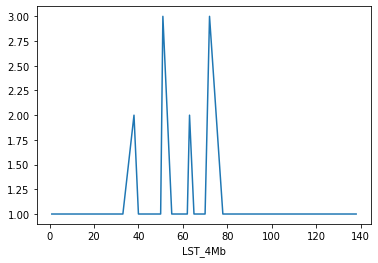

In [267]:
results_inform.groupby('LST_4Mb').size().plot()

<AxesSubplot:xlabel='LST_4Mb', ylabel='Count'>

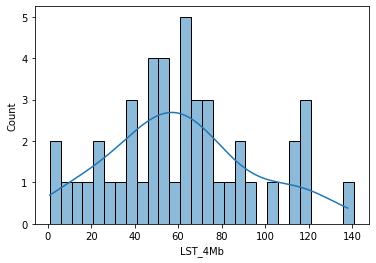

In [268]:
sns.histplot(results_inform['LST_4Mb'], binwidth=5, kde=True)

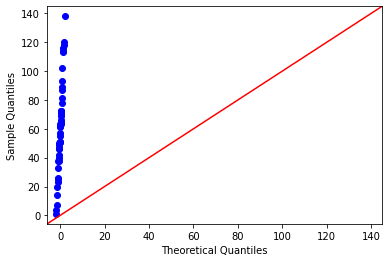

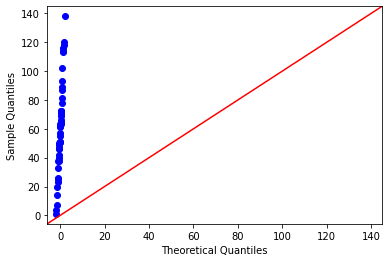

In [269]:
sm.qqplot(results_inform['LST_4Mb'], line='45')

<AxesSubplot:xlabel='LST_4Mb'>

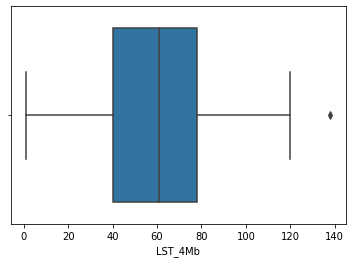

In [270]:
sns.boxplot(x=results_inform['LST_4Mb'])

In [271]:
find_outliers(results_inform, 'LST_4Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0


#### LST 3Mb

In [272]:
results_inform['LST_3Mb'].mean()

82.5111111111111

In [273]:
results_inform['LST_3Mb'].median()

79.0

In [274]:
results_inform['LST_3Mb'].var()

2184.755555555555

In [275]:
results_inform['LST_3Mb'].skew()

0.49482609134365396

In [276]:
results_inform['LST_3Mb'].kurtosis()

-0.21587822311993854

<AxesSubplot:xlabel='LST_3Mb'>

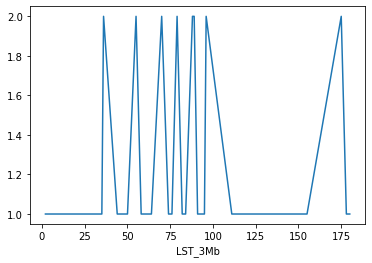

In [277]:
results_inform.groupby('LST_3Mb').size().plot()

<AxesSubplot:xlabel='LST_3Mb', ylabel='Count'>

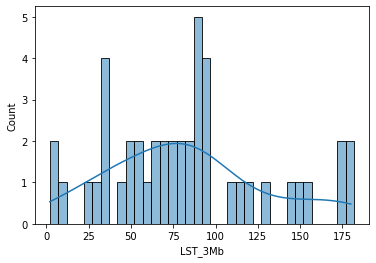

In [278]:
sns.histplot(results_inform['LST_3Mb'], binwidth=5, kde=True)

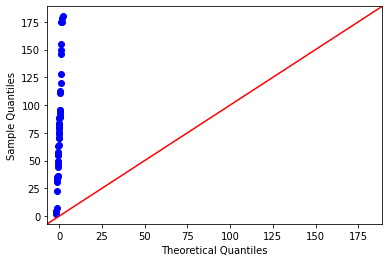

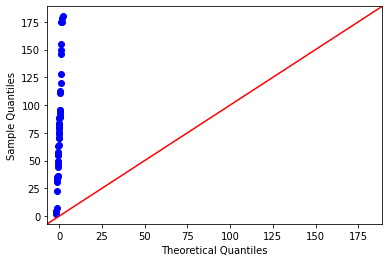

In [279]:
sm.qqplot(results_inform['LST_3Mb'], line='45')

<AxesSubplot:xlabel='LST_3Mb'>

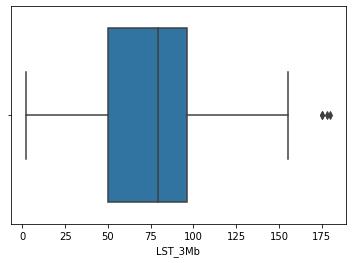

In [280]:
sns.boxplot(x=results_inform['LST_3Mb'])

In [281]:
find_outliers(results_inform, 'LST_3Mb')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive,1.0,0.0
20,P17/P17.I062.020.WGS_events.txt,P17/P17.I062.020.WGS.Source.vcf.gz,I062_020.T,1.001479,0,0,175,120,80,54,38,30,25,15,9,9,15,25,30,38,54,80,120,175,18.0,unknown,negative,0.0,NaN
35,P32/P32.I027.011.WGS.nexus_export.txt,P32/P32.I027.011.WGS.bwa.HF.Source.vcf.gz,I027.011.Tumor,1.090837,0,0,175,118,80,56,46,33,23,18,13,13,18,23,33,46,56,80,118,175,14.0,unknown,unknown,NaN,NaN


### HRD

#### HRD s LST_11Mb

In [282]:
results_inform['HRD_11'].mean()

19.42222222222222

In [283]:
results_inform['HRD_11'].median()

18.0

In [284]:
results_inform['HRD_11'].var()

189.38585858585859

In [285]:
results_inform['HRD_11'].skew()

3.8698652374578293

In [286]:
results_inform['HRD_11'].kurtosis()

20.79230421109744

<AxesSubplot:xlabel='HRD_11'>

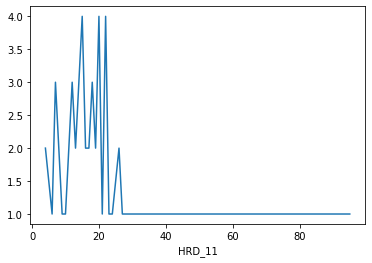

In [287]:
results_inform.groupby('HRD_11').size().plot()

<AxesSubplot:xlabel='HRD_11', ylabel='Count'>

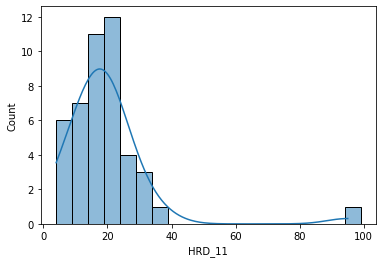

In [288]:
sns.histplot(results_inform['HRD_11'], binwidth=5, kde=True)

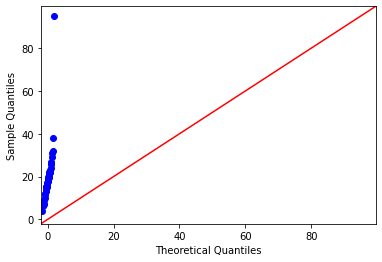

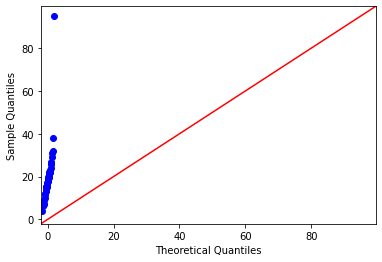

In [289]:
sm.qqplot(results_inform['HRD_11'], line='45')

<AxesSubplot:xlabel='HRD_11'>

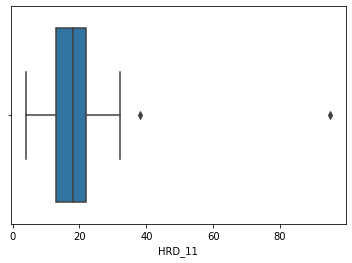

In [290]:
sns.boxplot(x=results_inform['HRD_11'])

In [291]:
find_outliers(results_inform, 'HRD_11')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,89,72,60,51,43,40,36,33,29,38,42,45,49,52,60,69,81,98,14.0,unknown,positive,1.0,NaN


#### HRD s LST_10Mb

In [292]:
results_inform['HRD_10'].mean()

22.155555555555555

In [293]:
results_inform['HRD_10'].median()

21.0

In [294]:
results_inform['HRD_10'].var()

209.54343434343437

In [295]:
results_inform['HRD_10'].skew()

3.6595492222763033

In [296]:
results_inform['HRD_10'].kurtosis()

18.921272440540147

<AxesSubplot:xlabel='HRD_10'>

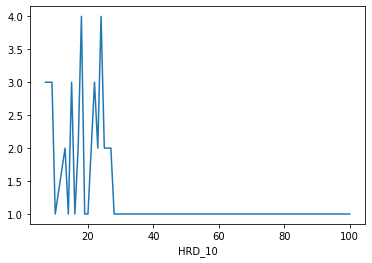

In [297]:
results_inform.groupby('HRD_10').size().plot()

<AxesSubplot:xlabel='HRD_10', ylabel='Count'>

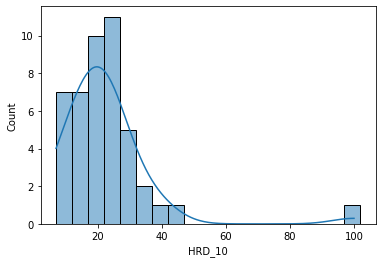

In [298]:
sns.histplot(results_inform['HRD_10'], binwidth=5, kde=True)

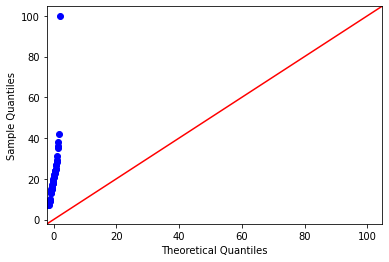

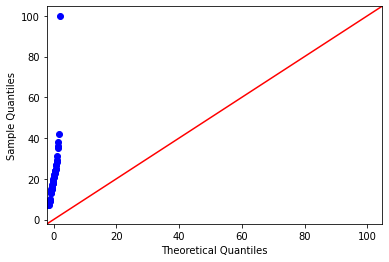

In [299]:
sm.qqplot(results_inform['HRD_10'], line='45')

<AxesSubplot:xlabel='HRD_10'>

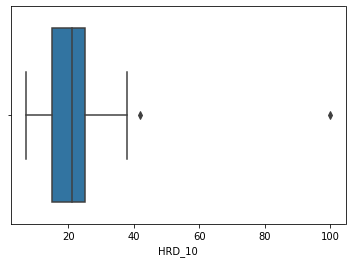

In [300]:
sns.boxplot(x=results_inform['HRD_10'])

In [301]:
find_outliers(results_inform, 'HRD_10')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,89,72,60,51,43,40,36,33,29,38,42,45,49,52,60,69,81,98,14.0,unknown,positive,1.0,NaN


#### HRD s LST_9Mb

In [302]:
results_inform['HRD_9'].mean()

25.377777777777776

In [303]:
results_inform['HRD_9'].median()

24.0

In [304]:
results_inform['HRD_9'].var()

252.3313131313131

In [305]:
results_inform['HRD_9'].skew()

3.4113414812461493

In [306]:
results_inform['HRD_9'].kurtosis()

17.192340442924056

<AxesSubplot:xlabel='HRD_9'>

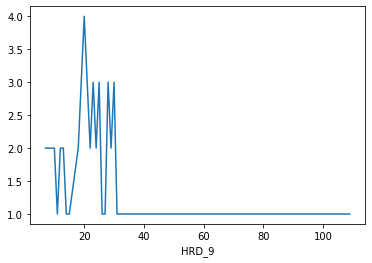

In [307]:
results_inform.groupby('HRD_9').size().plot()

<AxesSubplot:xlabel='HRD_9', ylabel='Count'>

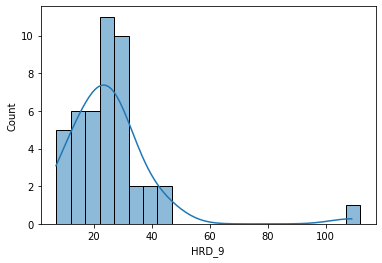

In [308]:
sns.histplot(results_inform['HRD_9'], binwidth=5, kde=True)

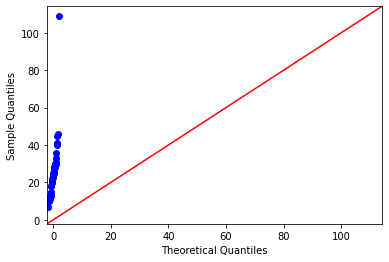

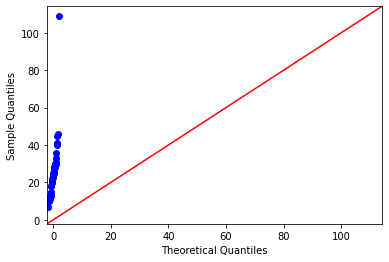

In [309]:
sm.qqplot(results_inform['HRD_9'], line='45')

<AxesSubplot:xlabel='HRD_9'>

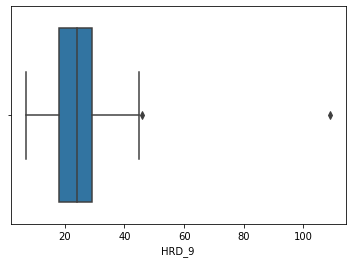

In [310]:
sns.boxplot(x=results_inform['HRD_9'])

In [311]:
find_outliers(results_inform, 'HRD_9')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0


#### HRD s LST_8Mb

In [312]:
results_inform['HRD_8'].mean()

30.022222222222222

In [313]:
results_inform['HRD_8'].median()

28.0

In [314]:
results_inform['HRD_8'].var()

310.88585858585856

In [315]:
results_inform['HRD_8'].skew()

2.9465346541773734

In [316]:
results_inform['HRD_8'].kurtosis()

13.621170549206681

<AxesSubplot:xlabel='HRD_8'>

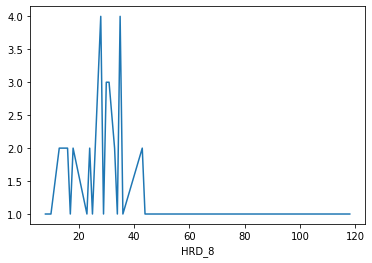

In [317]:
results_inform.groupby('HRD_8').size().plot()

<AxesSubplot:xlabel='HRD_8', ylabel='Count'>

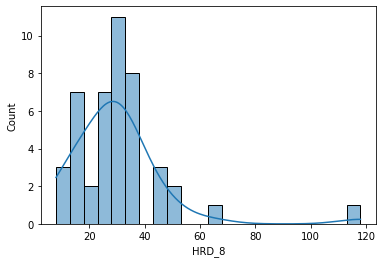

In [318]:
sns.histplot(results_inform['HRD_8'], binwidth=5, kde=True)

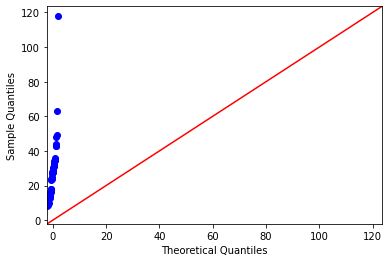

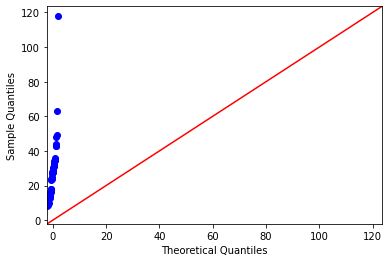

In [319]:
sm.qqplot(results_inform['HRD_8'], line='45')

<AxesSubplot:xlabel='HRD_8'>

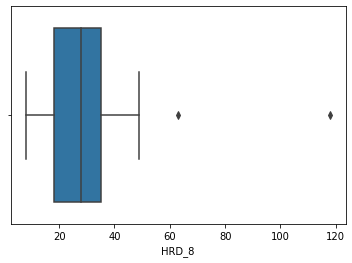

In [320]:
sns.boxplot(x=results_inform['HRD_8'])

In [321]:
find_outliers(results_inform, 'HRD_8')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0


#### HRD s LST_7Mb

In [322]:
results_inform['HRD_7'].mean()

35.22222222222222

In [323]:
results_inform['HRD_7'].median()

34.0

In [324]:
results_inform['HRD_7'].var()

342.35858585858585

In [325]:
results_inform['HRD_7'].skew()

2.366867957143463

In [326]:
results_inform['HRD_7'].kurtosis()

9.902748445528983

<AxesSubplot:xlabel='HRD_7'>

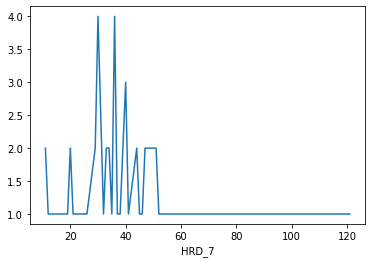

In [327]:
results_inform.groupby('HRD_7').size().plot()

<AxesSubplot:xlabel='HRD_7', ylabel='Count'>

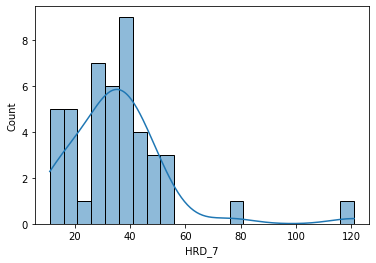

In [328]:
sns.histplot(results_inform['HRD_7'], binwidth=5, kde=True)

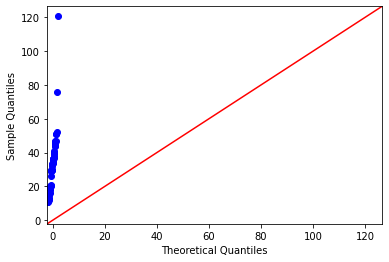

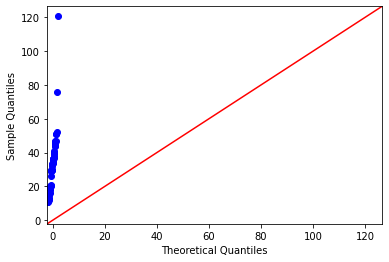

In [329]:
sm.qqplot(results_inform['HRD_7'], line='45')

<AxesSubplot:xlabel='HRD_7'>

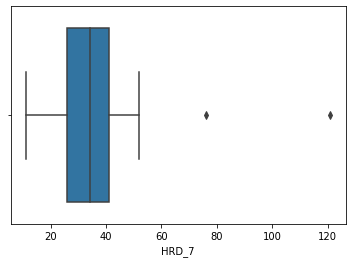

In [330]:
sns.boxplot(x=results_inform['HRD_7'])

In [331]:
find_outliers(results_inform, 'HRD_7')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0


#### HRD s LST_6Mb

In [332]:
results_inform['HRD_6'].mean()

41.2

In [333]:
results_inform['HRD_6'].median()

39.0

In [334]:
results_inform['HRD_6'].var()

458.52727272727276

In [335]:
results_inform['HRD_6'].skew()

1.780787966657083

In [336]:
results_inform['HRD_6'].kurtosis()

6.201465975320868

<AxesSubplot:xlabel='HRD_6'>

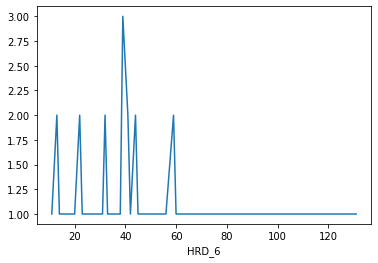

In [337]:
results_inform.groupby('HRD_6').size().plot()

<AxesSubplot:xlabel='HRD_6', ylabel='Count'>

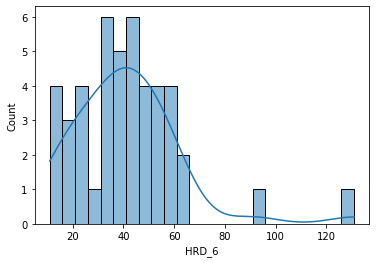

In [338]:
sns.histplot(results_inform['HRD_6'], binwidth=5, kde=True)

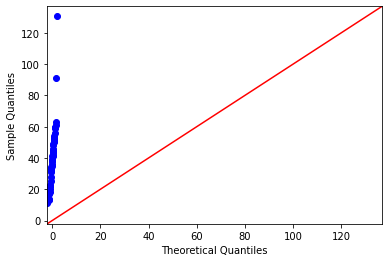

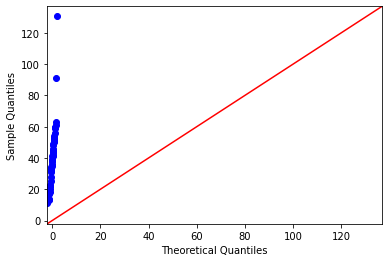

In [339]:
sm.qqplot(results_inform['HRD_6'], line='45')

<AxesSubplot:xlabel='HRD_6'>

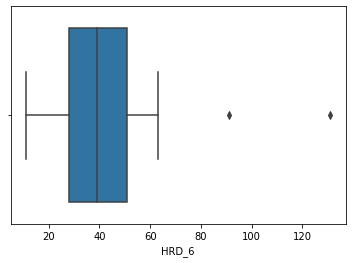

In [340]:
sns.boxplot(x=results_inform['HRD_6'])

In [341]:
find_outliers(results_inform, 'HRD_6')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0


#### HRD s LST_5Mb

In [342]:
results_inform['HRD_5'].mean()

50.75555555555555

In [343]:
results_inform['HRD_5'].median()

48.0

In [344]:
results_inform['HRD_5'].var()

696.461616161616

In [345]:
results_inform['HRD_5'].skew()

1.2119507947429293

In [346]:
results_inform['HRD_5'].kurtosis()

3.1602961835503245

<AxesSubplot:xlabel='HRD_5'>

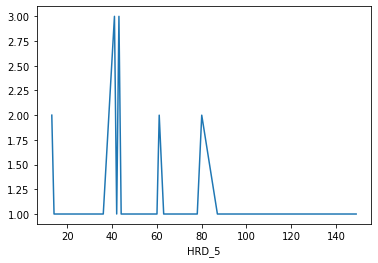

In [347]:
results_inform.groupby('HRD_5').size().plot()

<AxesSubplot:xlabel='HRD_5', ylabel='Count'>

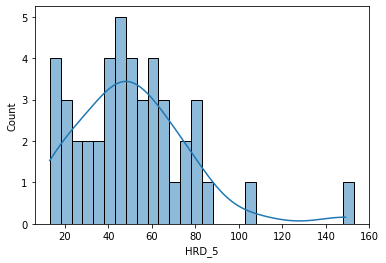

In [348]:
sns.histplot(results_inform['HRD_5'], binwidth=5, kde=True)

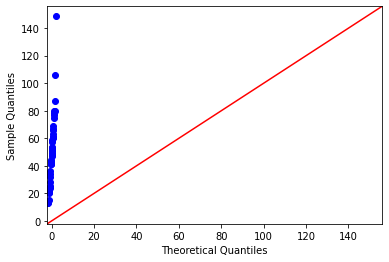

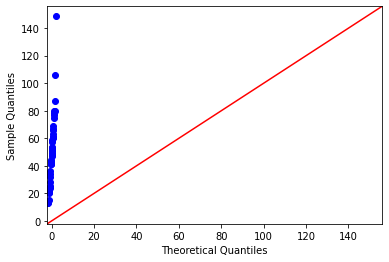

In [349]:
sm.qqplot(results_inform['HRD_5'], line='45')

<AxesSubplot:xlabel='HRD_5'>

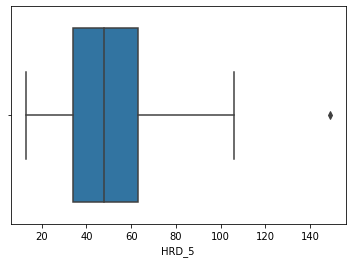

In [350]:
sns.boxplot(x=results_inform['HRD_5'])

In [351]:
find_outliers(results_inform, 'HRD_5')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0


#### HRD s LST_4Mb

In [352]:
results_inform['HRD_4'].mean()

64.75555555555556

In [353]:
results_inform['HRD_4'].median()

62.0

In [354]:
results_inform['HRD_4'].var()

1318.1888888888889

In [355]:
results_inform['HRD_4'].skew()

1.06125326903967

In [356]:
results_inform['HRD_4'].kurtosis()

1.6708651247120438

<AxesSubplot:xlabel='HRD_4'>

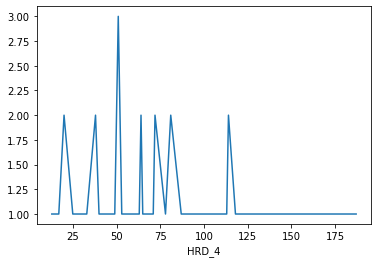

In [357]:
results_inform.groupby('HRD_4').size().plot()

<AxesSubplot:xlabel='HRD_4', ylabel='Count'>

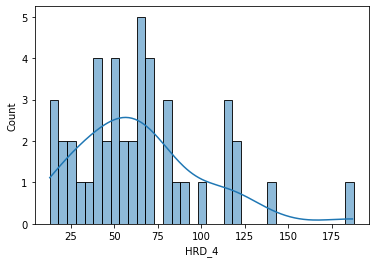

In [358]:
sns.histplot(results_inform['HRD_4'], binwidth=5, kde=True)

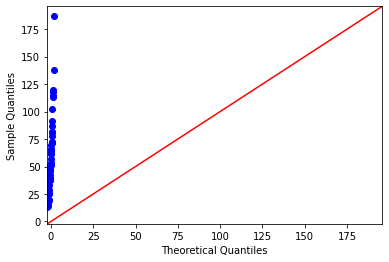

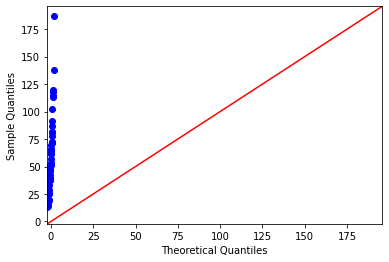

In [359]:
sm.qqplot(results_inform['HRD_4'], line='45')

<AxesSubplot:xlabel='HRD_4'>

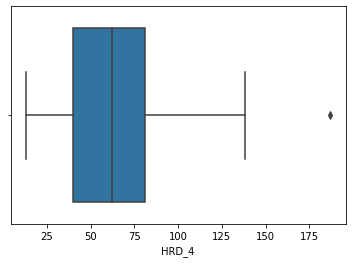

In [360]:
sns.boxplot(x=results_inform['HRD_4'])

In [361]:
find_outliers(results_inform, 'HRD_4')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0


#### HRD s LST_3Mb

In [362]:
results_inform['HRD_3'].mean()

86.11111111111111

In [363]:
results_inform['HRD_3'].median()

79.0

In [364]:
results_inform['HRD_3'].var()

2460.555555555555

In [365]:
results_inform['HRD_3'].skew()

0.8779735081899042

In [366]:
results_inform['HRD_3'].kurtosis()

0.4401861397283193

<AxesSubplot:xlabel='HRD_3'>

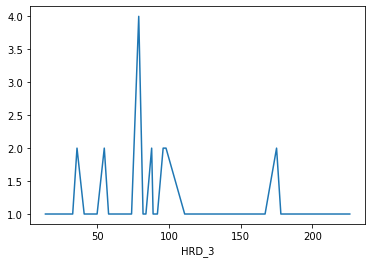

In [367]:
results_inform.groupby('HRD_3').size().plot()

<AxesSubplot:xlabel='HRD_3', ylabel='Count'>

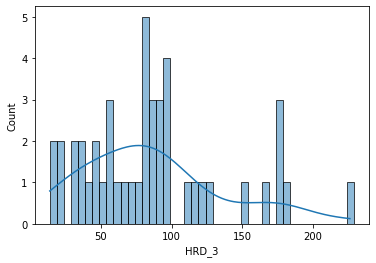

In [368]:
sns.histplot(results_inform['HRD_3'], binwidth=5, kde=True)

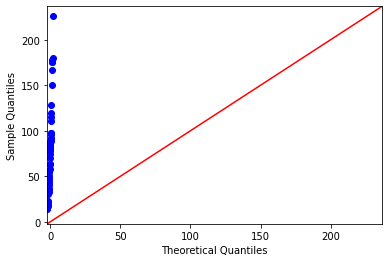

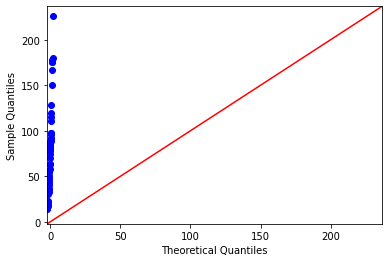

In [369]:
sm.qqplot(results_inform['HRD_3'], line='45')

<AxesSubplot:xlabel='HRD_3'>

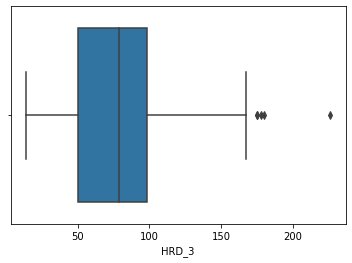

In [370]:
sns.boxplot(x=results_inform['HRD_3'])

In [371]:
find_outliers(results_inform, 'HRD_3')

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive,1.0,0.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0
20,P17/P17.I062.020.WGS_events.txt,P17/P17.I062.020.WGS.Source.vcf.gz,I062_020.T,1.001479,0,0,175,120,80,54,38,30,25,15,9,9,15,25,30,38,54,80,120,175,18.0,unknown,negative,0.0,NaN
35,P32/P32.I027.011.WGS.nexus_export.txt,P32/P32.I027.011.WGS.bwa.HF.Source.vcf.gz,I027.011.Tumor,1.090837,0,0,175,118,80,56,46,33,23,18,13,13,18,23,33,46,56,80,118,175,14.0,unknown,unknown,NaN,NaN


### Párová analýza atribútov

#### Porovnanie skupín pacientov

V tejto časti porovnáme rozdiely hodnôt jednotlivých atribútov medzi skupinou pacientov, u ktorých sa ochorenie stabilizovalo a skupinou pacientov, ktorý umreli.
To, či je  medzi skupinami pacientov signifikantný rozdiel vzhľadom na hodnoty konkrétneho atribútu si overíme aj štatistickým testom. Vzhľadom na malé množstvo vzoriek v jednotlivých skupinách použijeme Welchov t-test.

In [372]:
inform_stable = results_inform.loc[results_inform['Response - real'] == 'stable']
inform_deceased = results_inform.loc[results_inform['Response - real'] == 'deceased']

In [373]:
inform_positive = results_inform.loc[results_inform['Response - cell lines'] == 'positive']
inform_negative = results_inform.loc[results_inform['Response - cell lines'] == 'negative']

#### TAI

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='TAI'>

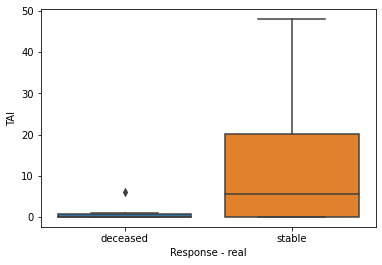

In [374]:
sns.boxplot(x='Response - real', y='TAI', data=inform_known_real_response)

In [375]:
stats.ttest_ind(inform_stable['TAI'], inform_deceased['TAI'], equal_var=False)

Ttest_indResult(statistic=1.1889451456615616, pvalue=0.31886517839601425)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='TAI', ylabel='Count'>

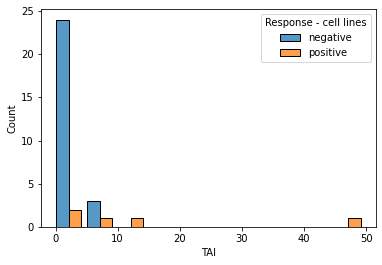

In [376]:
sns.histplot(data=inform_known_cl_response, x='TAI', binwidth=5, hue='Response - cell lines', multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Response - cell lines', ylabel='TAI'>

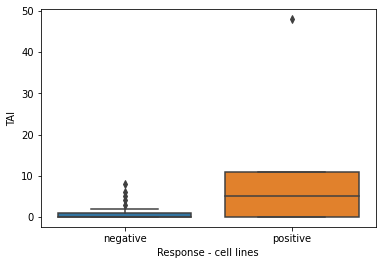

In [377]:
sns.boxplot(x='Response - cell lines', y='TAI', data=inform_known_cl_response)

In [378]:
stats.ttest_ind(inform_positive['TAI'], inform_negative['TAI'], equal_var=False)

Ttest_indResult(statistic=1.2930729652627067, pvalue=0.265337116301294)

#### LOH

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LOH'>

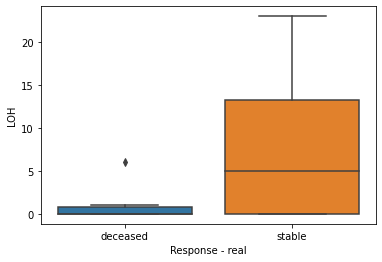

In [379]:
sns.boxplot(x='Response - real', y='LOH', data=inform_known_real_response)

In [380]:
stats.ttest_ind(inform_stable['LOH'], inform_deceased['LOH'], equal_var=False)

Ttest_indResult(statistic=1.278607566156202, pvalue=0.2860008275320764)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LOH', ylabel='Count'>

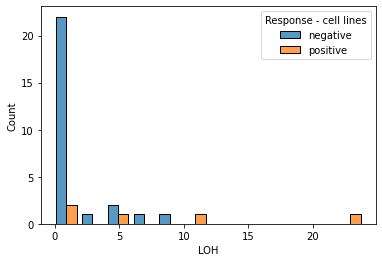

In [381]:
sns.histplot(data=inform_known_cl_response, x='LOH', binwidth=2, hue='Response - cell lines', multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LOH'>

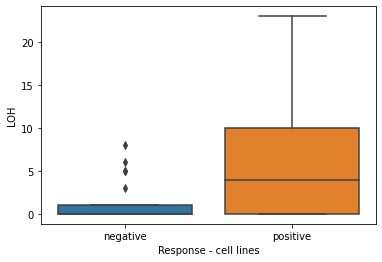

In [382]:
sns.boxplot(x='Response - cell lines', y='LOH', data=inform_known_cl_response)

In [383]:
stats.ttest_ind(inform_positive['LOH'], inform_negative['LOH'], equal_var=False)

Ttest_indResult(statistic=1.4441310201780402, pvalue=0.22087970402504536)

#### LST_11Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_11Mb'>

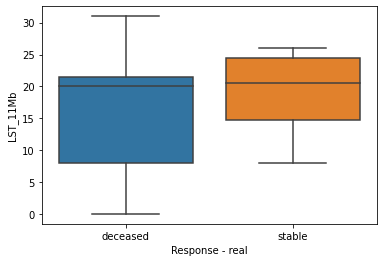

In [384]:
sns.boxplot(x='Response - real', y='LST_11Mb', data=inform_known_real_response)

In [385]:
stats.ttest_ind(inform_stable['LST_11Mb'], inform_deceased['LST_11Mb'], equal_var=False)

Ttest_indResult(statistic=0.4102237717211921, pvalue=0.6924896703530292)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_11Mb', ylabel='Count'>

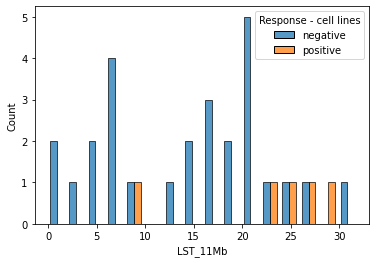

In [386]:
sns.histplot(data=inform_known_cl_response, x='LST_11Mb', binwidth=2, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_11Mb'>

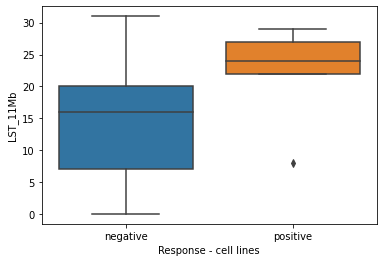

In [387]:
sns.boxplot(x='Response - cell lines', y='LST_11Mb', data=inform_known_cl_response)

In [388]:
stats.ttest_ind(inform_positive['LST_11Mb'], inform_negative['LST_11Mb'], equal_var=False)

Ttest_indResult(statistic=1.9502879121447816, pvalue=0.10179939471698046)

#### LST_10Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_10Mb'>

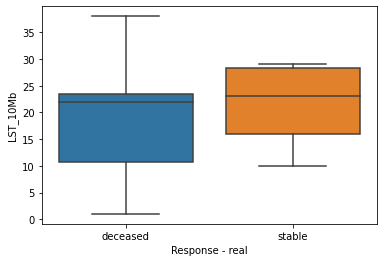

In [389]:
sns.boxplot(x='Response - real', y='LST_10Mb', data=inform_known_real_response)

In [390]:
stats.ttest_ind(inform_stable['LST_10Mb'], inform_deceased['LST_10Mb'], equal_var=False)

Ttest_indResult(statistic=0.32046264417857045, pvalue=0.7568709648692061)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_10Mb', ylabel='Count'>

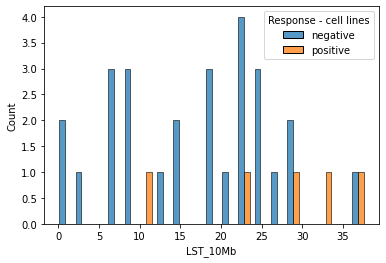

In [391]:
sns.histplot(data=inform_known_cl_response, x='LST_10Mb', binwidth=2, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_10Mb'>

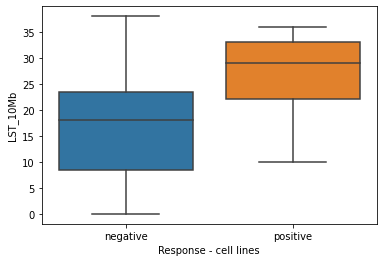

In [392]:
sns.boxplot(x='Response - cell lines', y='LST_10Mb', data=inform_known_cl_response)

In [393]:
stats.ttest_ind(inform_positive['LST_10Mb'], inform_negative['LST_10Mb'], equal_var=False)

Ttest_indResult(statistic=1.8644385635206187, pvalue=0.1176846119767406)

#### LST_9Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_9Mb'>

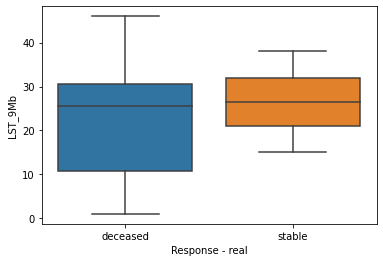

In [394]:
sns.boxplot(x='Response - real', y='LST_9Mb', data=inform_known_real_response)

In [395]:
stats.ttest_ind(inform_stable['LST_9Mb'], inform_deceased['LST_9Mb'], equal_var=False)

Ttest_indResult(statistic=0.45906446177561305, pvalue=0.6584482136656873)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_9Mb', ylabel='Count'>

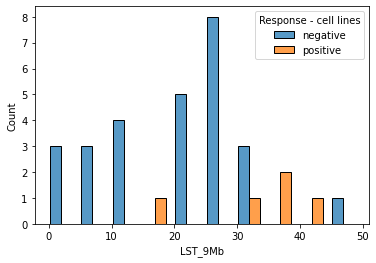

In [396]:
sns.histplot(data=inform_known_cl_response, x='LST_9Mb', binwidth=5, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_9Mb'>

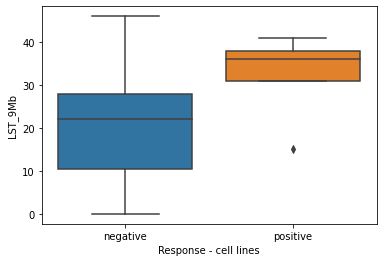

In [397]:
sns.boxplot(x='Response - cell lines', y='LST_9Mb', data=inform_known_cl_response)

In [398]:
stats.ttest_ind(inform_positive['LST_9Mb'], inform_negative['LST_9Mb'], equal_var=False)

Ttest_indResult(statistic=2.4570666938772754, pvalue=0.049702364899963124)

#### LST_8Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_8Mb'>

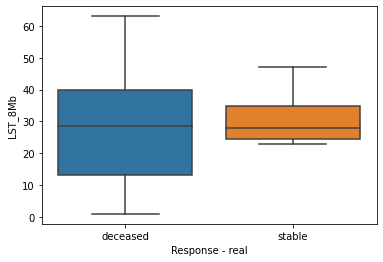

In [399]:
sns.boxplot(x='Response - real', y='LST_8Mb', data=inform_known_real_response)

In [400]:
stats.ttest_ind(inform_stable['LST_8Mb'], inform_deceased['LST_8Mb'], equal_var=False)

Ttest_indResult(statistic=0.24916194774735886, pvalue=0.8098701901883318)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_8Mb', ylabel='Count'>

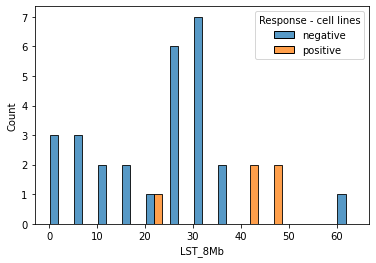

In [401]:
sns.histplot(data=inform_known_cl_response, x='LST_8Mb', binwidth=5, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_8Mb'>

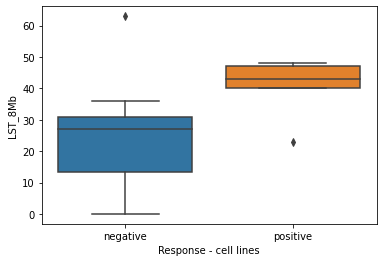

In [402]:
sns.boxplot(x='Response - cell lines', y='LST_8Mb', data=inform_known_cl_response)

In [403]:
stats.ttest_ind(inform_positive['LST_8Mb'], inform_negative['LST_8Mb'], equal_var=False)

Ttest_indResult(statistic=3.1972076667714258, pvalue=0.014875489678876154)

#### LST_7Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_7Mb'>

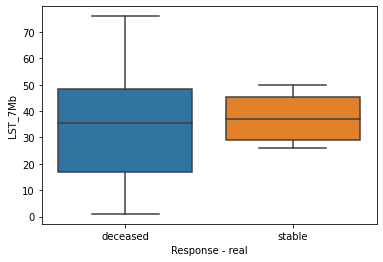

In [404]:
sns.boxplot(x='Response - real', y='LST_7Mb', data=inform_known_real_response)

In [405]:
stats.ttest_ind(inform_stable['LST_7Mb'], inform_deceased['LST_7Mb'], equal_var=False)

Ttest_indResult(statistic=0.18781543667916467, pvalue=0.8562349498715568)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_7Mb', ylabel='Count'>

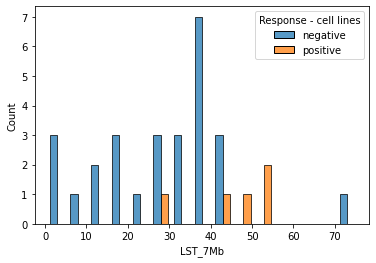

In [406]:
sns.histplot(data=inform_known_cl_response, x='LST_7Mb', binwidth=5, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_7Mb'>

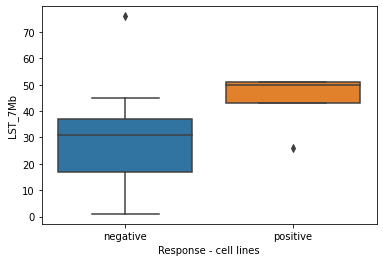

In [407]:
sns.boxplot(x='Response - cell lines', y='LST_7Mb', data=inform_known_cl_response)

In [408]:
stats.ttest_ind(inform_positive['LST_7Mb'], inform_negative['LST_7Mb'], equal_var=False)

Ttest_indResult(statistic=2.7491735058124185, pvalue=0.02477728630813929)

#### LST_6Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_6Mb'>

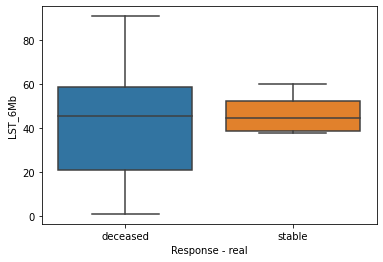

In [409]:
sns.boxplot(x='Response - real', y='LST_6Mb', data=inform_known_real_response)

In [410]:
stats.ttest_ind(inform_stable['LST_6Mb'], inform_deceased['LST_6Mb'], equal_var=False)

Ttest_indResult(statistic=0.24950710644885302, pvalue=0.8108172078491622)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_6Mb', ylabel='Count'>

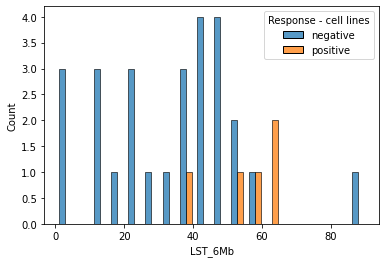

In [411]:
sns.histplot(data=inform_known_cl_response, x='LST_6Mb', binwidth=5, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_6Mb'>

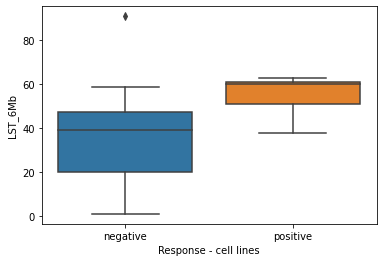

In [412]:
sns.boxplot(x='Response - cell lines', y='LST_6Mb', data=inform_known_cl_response)

In [413]:
stats.ttest_ind(inform_positive['LST_6Mb'], inform_negative['LST_6Mb'], equal_var=False)

Ttest_indResult(statistic=3.3077403803496446, pvalue=0.006981503615044668)

#### LST_5Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_5Mb'>

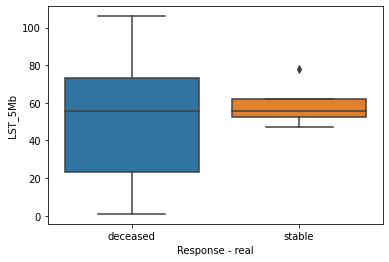

In [414]:
sns.boxplot(x='Response - real', y='LST_5Mb', data=inform_known_real_response)

In [415]:
stats.ttest_ind(inform_stable['LST_5Mb'], inform_deceased['LST_5Mb'], equal_var=False)

Ttest_indResult(statistic=0.4229127321799935, pvalue=0.6858787707026899)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_5Mb', ylabel='Count'>

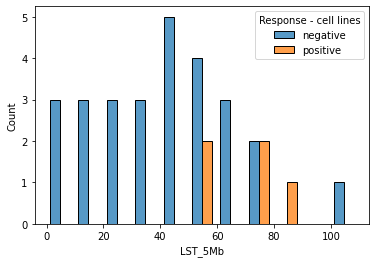

In [416]:
sns.histplot(data=inform_known_cl_response, x='LST_5Mb', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_5Mb'>

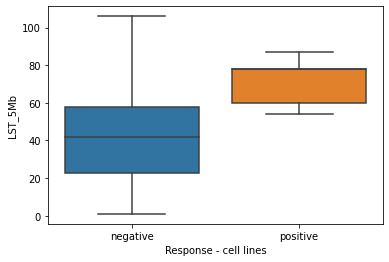

In [417]:
sns.boxplot(x='Response - cell lines', y='LST_5Mb', data=inform_known_cl_response)

In [418]:
stats.ttest_ind(inform_positive['LST_5Mb'], inform_negative['LST_5Mb'], equal_var=False)

Ttest_indResult(statistic=3.7675632888484616, pvalue=0.003651507217403488)

#### LST_4Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_4Mb'>

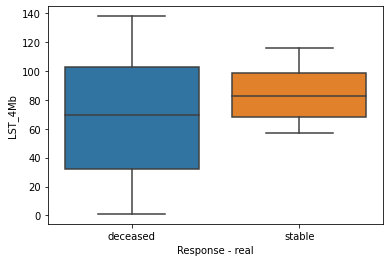

In [419]:
sns.boxplot(x='Response - real', y='LST_4Mb', data=inform_known_real_response)

In [420]:
stats.ttest_ind(inform_stable['LST_4Mb'], inform_deceased['LST_4Mb'], equal_var=False)

Ttest_indResult(statistic=0.6332686025178151, pvalue=0.545143872636203)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_4Mb', ylabel='Count'>

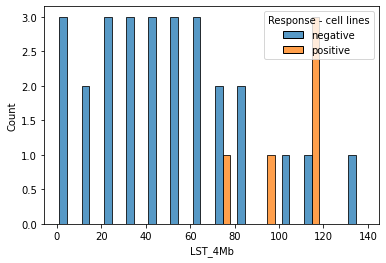

In [421]:
sns.histplot(data=inform_known_cl_response, x='LST_4Mb', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_4Mb'>

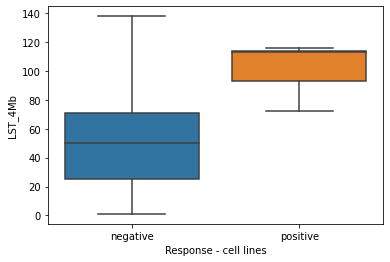

In [422]:
sns.boxplot(x='Response - cell lines', y='LST_4Mb', data=inform_known_cl_response)

In [423]:
stats.ttest_ind(inform_positive['LST_4Mb'], inform_negative['LST_4Mb'], equal_var=False)

Ttest_indResult(statistic=4.518989527201757, pvalue=0.001135910915970207)

#### LST_3Mb

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='LST_3Mb'>

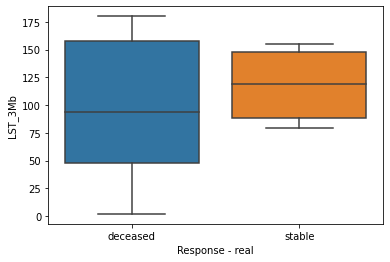

In [424]:
sns.boxplot(x='Response - real', y='LST_3Mb', data=inform_known_real_response)

In [425]:
stats.ttest_ind(inform_stable['LST_3Mb'], inform_deceased['LST_3Mb'], equal_var=False)

Ttest_indResult(statistic=0.6035399705536656, pvalue=0.563367125838545)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='LST_3Mb', ylabel='Count'>

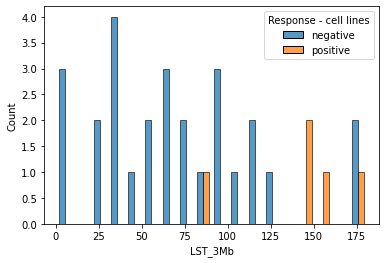

In [426]:
sns.histplot(data=inform_known_cl_response, x='LST_3Mb', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='LST_3Mb'>

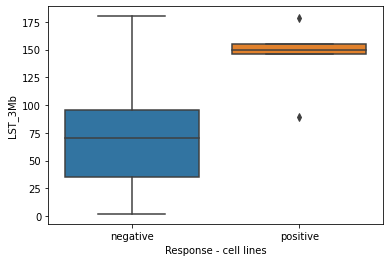

In [427]:
sns.boxplot(x='Response - cell lines', y='LST_3Mb', data=inform_known_cl_response)

In [428]:
stats.ttest_ind(inform_positive['LST_3Mb'], inform_negative['LST_3Mb'], equal_var=False)

Ttest_indResult(statistic=4.1906624003856265, pvalue=0.0035839345057137252)

#### HRD_11

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_11'>

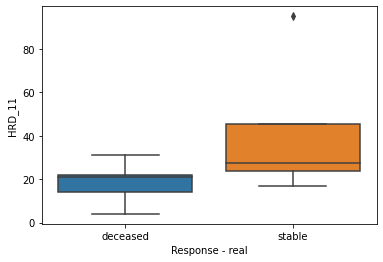

In [429]:
sns.boxplot(x='Response - real', y='HRD_11', data=inform_known_real_response)

In [430]:
stats.ttest_ind(inform_stable['HRD_11'], inform_deceased['HRD_11'], equal_var=False)

Ttest_indResult(statistic=1.2682420873163633, pvalue=0.28740997145848673)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_11', ylabel='Count'>

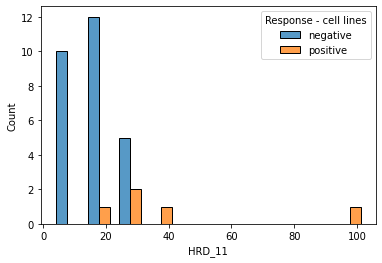

In [431]:
sns.histplot(data=inform_known_cl_response, x='HRD_11', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_11'>

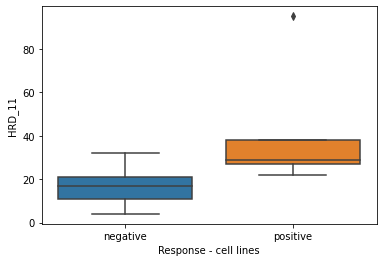

In [432]:
sns.boxplot(x='Response - cell lines', y='HRD_11', data=inform_known_cl_response)

In [433]:
stats.ttest_ind(inform_positive['HRD_11'], inform_negative['HRD_11'], equal_var=False)

Ttest_indResult(statistic=1.9086668345938487, pvalue=0.12724454318567907)

#### HRD_10

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_10'>

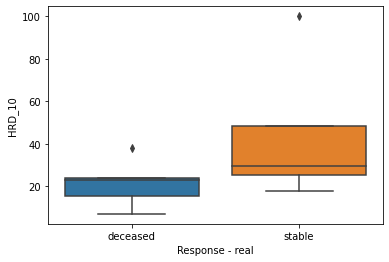

In [434]:
sns.boxplot(x='Response - real', y='HRD_10', data=inform_known_real_response)

In [435]:
stats.ttest_ind(inform_stable['HRD_10'], inform_deceased['HRD_10'], equal_var=False)

Ttest_indResult(statistic=1.188215962382784, pvalue=0.3126546187761141)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_10', ylabel='Count'>

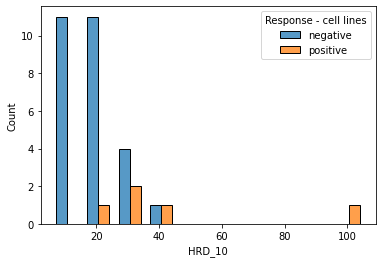

In [436]:
sns.histplot(data=inform_known_cl_response, x='HRD_10', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_10'>

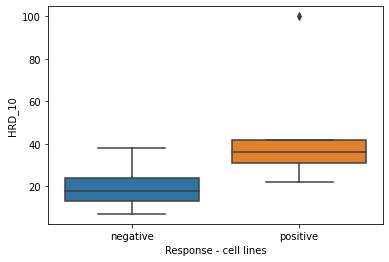

In [437]:
sns.boxplot(x='Response - cell lines', y='HRD_10', data=inform_known_cl_response)

In [438]:
stats.ttest_ind(inform_positive['HRD_10'], inform_negative['HRD_10'], equal_var=False)

Ttest_indResult(statistic=1.9541408883919378, pvalue=0.12046657222162514)

#### HRD_9

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_9'>

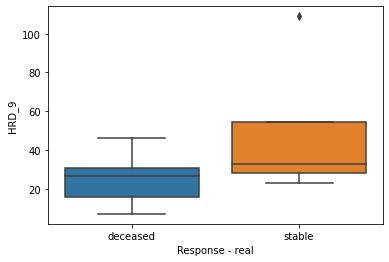

In [439]:
sns.boxplot(x='Response - real', y='HRD_9', data=inform_known_real_response)

In [440]:
stats.ttest_ind(inform_stable['HRD_9'], inform_deceased['HRD_9'], equal_var=False)

Ttest_indResult(statistic=1.178097939845104, pvalue=0.3128697677146779)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_9', ylabel='Count'>

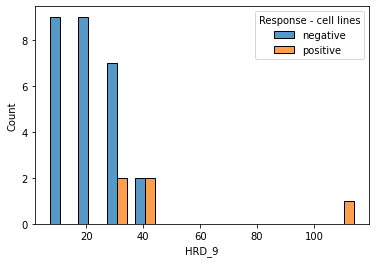

In [441]:
sns.histplot(data=inform_known_cl_response, x='HRD_9', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_9'>

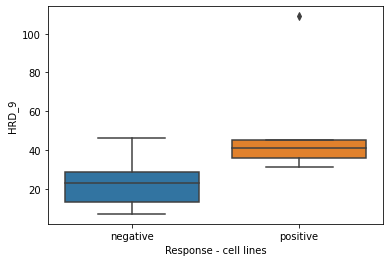

In [442]:
sns.boxplot(x='Response - cell lines', y='HRD_9', data=inform_known_cl_response)

In [443]:
stats.ttest_ind(inform_positive['HRD_9'], inform_negative['HRD_9'], equal_var=False)

Ttest_indResult(statistic=2.103278472021243, pvalue=0.1008741441562931)

#### HRD_8

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_8'>

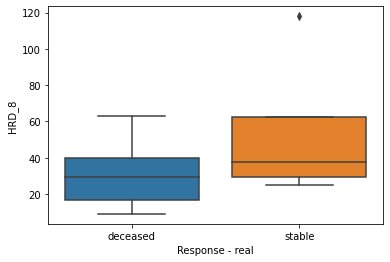

In [444]:
sns.boxplot(x='Response - real', y='HRD_8', data=inform_known_real_response)

In [445]:
stats.ttest_ind(inform_stable['HRD_8'], inform_deceased['HRD_8'], equal_var=False)

Ttest_indResult(statistic=1.0136202362785782, pvalue=0.36988149406292326)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_8', ylabel='Count'>

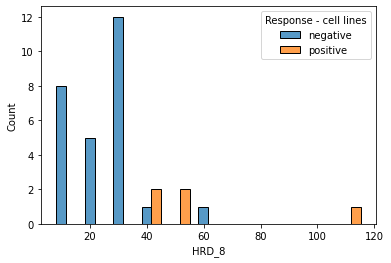

In [446]:
sns.histplot(data=inform_known_cl_response, x='HRD_8', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_8'>

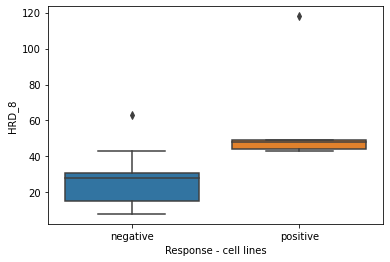

In [447]:
sns.boxplot(x='Response - cell lines', y='HRD_8', data=inform_known_cl_response)

In [448]:
stats.ttest_ind(inform_positive['HRD_8'], inform_negative['HRD_8'], equal_var=False)

Ttest_indResult(statistic=2.3734741556957393, pvalue=0.07326486915473218)

#### HRD_7

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_7'>

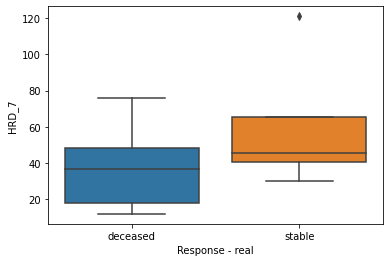

In [449]:
sns.boxplot(x='Response - real', y='HRD_7', data=inform_known_real_response)

In [450]:
stats.ttest_ind(inform_stable['HRD_7'], inform_deceased['HRD_7'], equal_var=False)

Ttest_indResult(statistic=1.0101070821185347, pvalue=0.3645187898001275)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_7', ylabel='Count'>

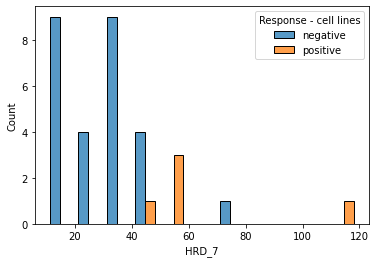

In [451]:
sns.histplot(data=inform_known_cl_response, x='HRD_7', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_7'>

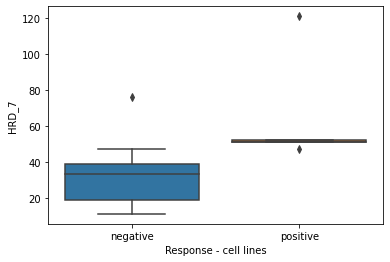

In [452]:
sns.boxplot(x='Response - cell lines', y='HRD_7', data=inform_known_cl_response)

In [453]:
stats.ttest_ind(inform_positive['HRD_7'], inform_negative['HRD_7'], equal_var=False)

Ttest_indResult(statistic=2.3358003632203026, pvalue=0.07481420401867066)

#### HRD_6

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_6'>

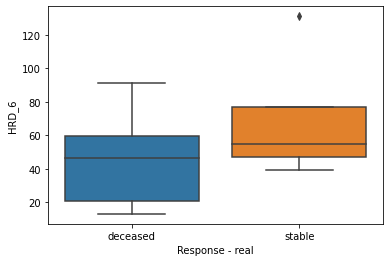

In [454]:
sns.boxplot(x='Response - real', y='HRD_6', data=inform_known_real_response)

In [455]:
stats.ttest_ind(inform_stable['HRD_6'], inform_deceased['HRD_6'], equal_var=False)

Ttest_indResult(statistic=1.003977264125784, pvalue=0.3608819600323277)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_6', ylabel='Count'>

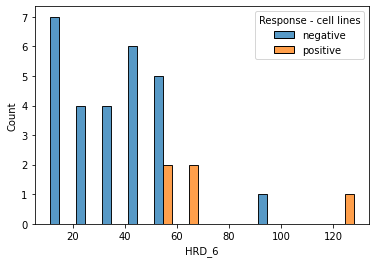

In [456]:
sns.histplot(data=inform_known_cl_response, x='HRD_6', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_6'>

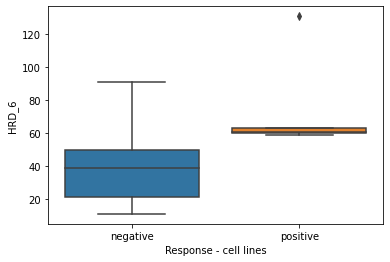

In [457]:
sns.boxplot(x='Response - cell lines', y='HRD_6', data=inform_known_cl_response)

In [458]:
stats.ttest_ind(inform_positive['HRD_6'], inform_negative['HRD_6'], equal_var=False)

Ttest_indResult(statistic=2.62220730318423, pvalue=0.05174343422134898)

#### HRD_5

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_5'>

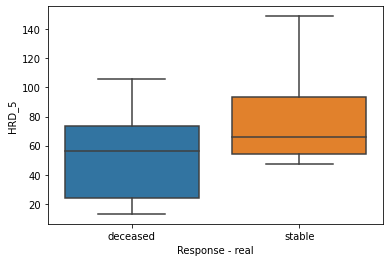

In [459]:
sns.boxplot(x='Response - real', y='HRD_5', data=inform_known_real_response)

In [460]:
stats.ttest_ind(inform_stable['HRD_5'], inform_deceased['HRD_5'], equal_var=False)

Ttest_indResult(statistic=1.0211454715791566, pvalue=0.35050246054193096)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_5', ylabel='Count'>

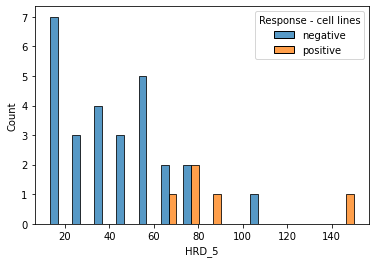

In [461]:
sns.histplot(data=inform_known_cl_response, x='HRD_5', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_5'>

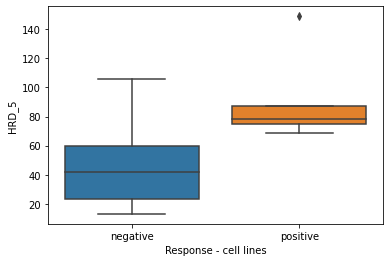

In [462]:
sns.boxplot(x='Response - cell lines', y='HRD_5', data=inform_known_cl_response)

In [463]:
stats.ttest_ind(inform_positive['HRD_5'], inform_negative['HRD_5'], equal_var=False)

Ttest_indResult(statistic=3.109682106632342, pvalue=0.028039983547239508)

#### HRD_4

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_4'>

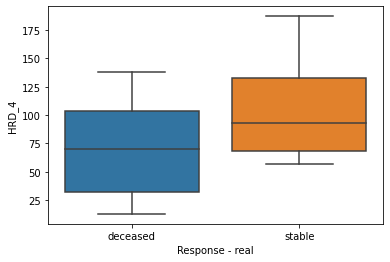

In [464]:
sns.boxplot(x='Response - real', y='HRD_4', data=inform_known_real_response)

In [465]:
stats.ttest_ind(inform_stable['HRD_4'], inform_deceased['HRD_4'], equal_var=False)

Ttest_indResult(statistic=1.029135792872698, pvalue=0.34446382932224245)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_4', ylabel='Count'>

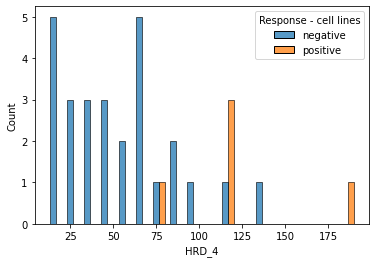

In [466]:
sns.histplot(data=inform_known_cl_response, x='HRD_4', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_4'>

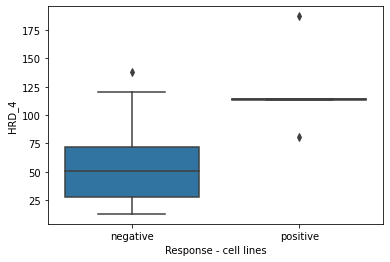

In [467]:
sns.boxplot(x='Response - cell lines', y='HRD_4', data=inform_known_cl_response)

In [468]:
stats.ttest_ind(inform_positive['HRD_4'], inform_negative['HRD_4'], equal_var=False)

Ttest_indResult(statistic=3.5909407971035114, pvalue=0.01517252156497375)

#### HRD_3

##### Reálne výsledky

<AxesSubplot:xlabel='Response - real', ylabel='HRD_3'>

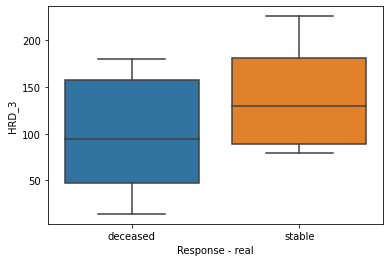

In [469]:
sns.boxplot(x='Response - real', y='HRD_3', data=inform_known_real_response)

In [470]:
stats.ttest_ind(inform_stable['HRD_3'], inform_deceased['HRD_3'], equal_var=False)

Ttest_indResult(statistic=0.9406154868968649, pvalue=0.3797117035800226)

##### Výsledky z bunkových línií

<AxesSubplot:xlabel='HRD_3', ylabel='Count'>

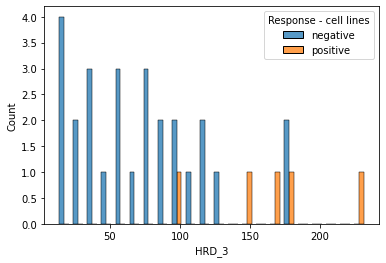

In [471]:
sns.histplot(data=inform_known_cl_response, x='HRD_3', binwidth=10, hue='Response - cell lines', multiple="dodge", shrink=.7)

<AxesSubplot:xlabel='Response - cell lines', ylabel='HRD_3'>

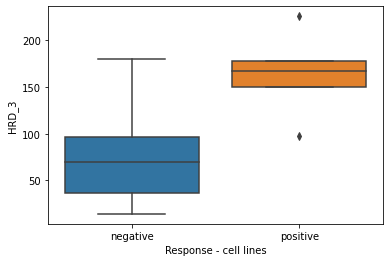

In [472]:
sns.boxplot(x='Response - cell lines', y='HRD_3', data=inform_known_cl_response)

In [473]:
stats.ttest_ind(inform_positive['HRD_3'], inform_negative['HRD_3'], equal_var=False)

Ttest_indResult(statistic=4.021506777210508, pvalue=0.008327213550636741)

Na všetkých grafoch možno vidieť, že pacienti, u ktorých nastala po nasadení liečby PARPi stabilizácia ochorenia, resp. nádory odhadované ako pozitívne, dosahujú o niečo vyššie hodnoty jednotlivých metrík. Rozdiely medzi skupinami však vo väčšine prípadov nepotvrdili štatistické testy, ktoré nedokázali vyvrátiť že skupiny majú rovnaký priemer hodnôt jednotlivých atribútov, čo bolo zrejme spôsobené veľmi malým množstvom dát.

#### Korelácie

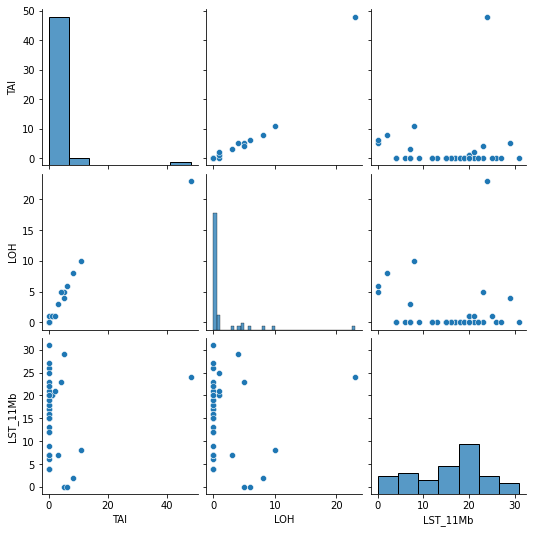

In [474]:
sns.pairplot(results_inform.loc[:, ['TAI', 'LOH', 'LST_11Mb']])

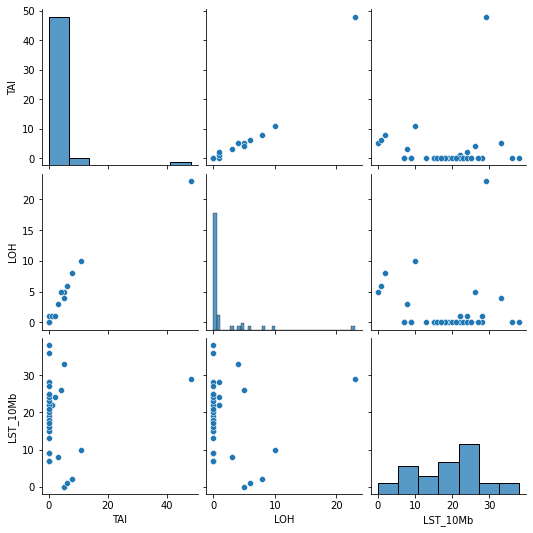

In [475]:
sns.pairplot(results_inform.loc[:, ['TAI', 'LOH', 'LST_10Mb']])

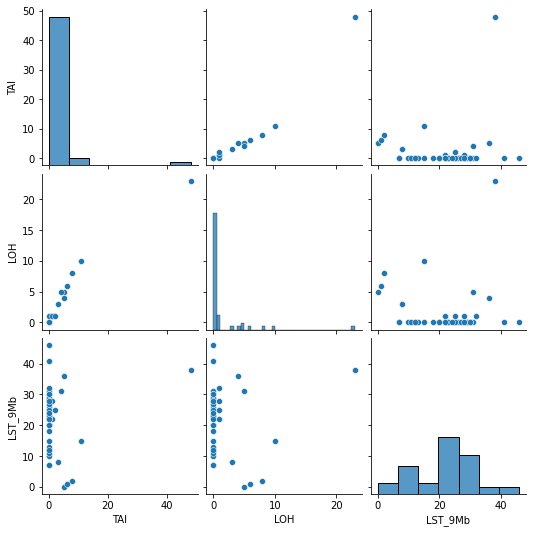

In [476]:
sns.pairplot(results_inform.loc[:, ['TAI', 'LOH', 'LST_9Mb']])

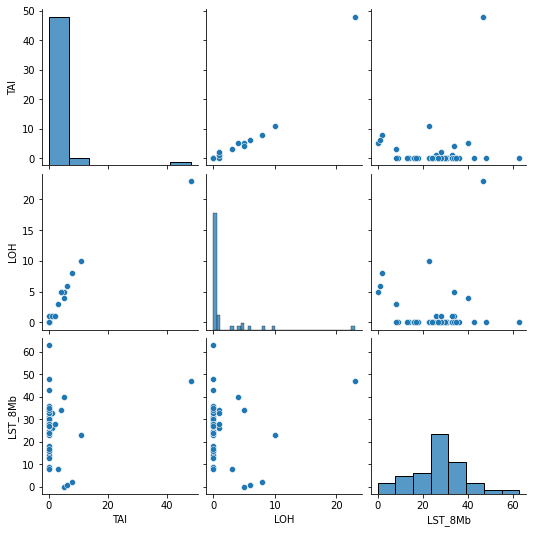

In [477]:
sns.pairplot(results_inform.loc[:, ['TAI', 'LOH', 'LST_8Mb']])

<AxesSubplot:>

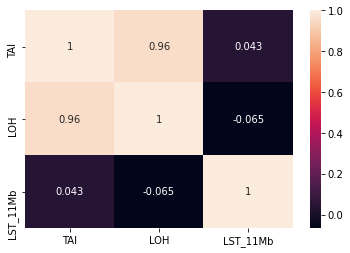

In [478]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_11Mb']].corr(), annot=True)

<AxesSubplot:>

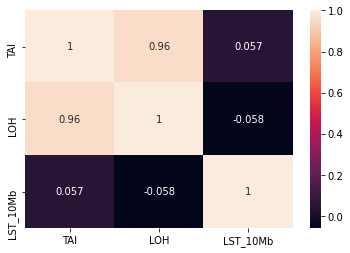

In [479]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_10Mb']].corr(), annot=True)

<AxesSubplot:>

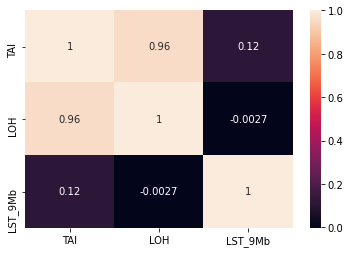

In [480]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_9Mb']].corr(), annot=True)

<AxesSubplot:>

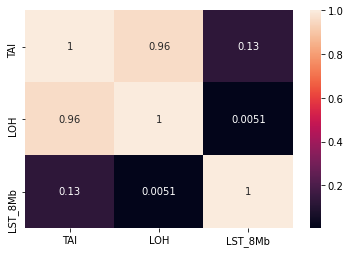

In [481]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_8Mb']].corr(), annot=True)

<AxesSubplot:>

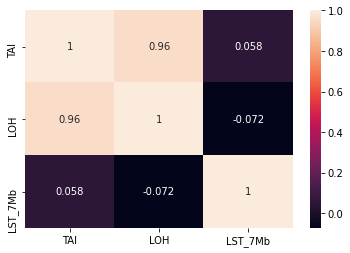

In [482]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_7Mb']].corr(), annot=True)

<AxesSubplot:>

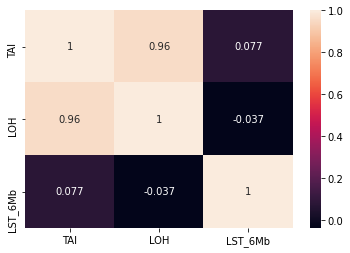

In [483]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_6Mb']].corr(), annot=True)

<AxesSubplot:>

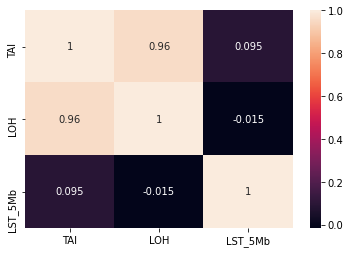

In [484]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_5Mb']].corr(), annot=True)

<AxesSubplot:>

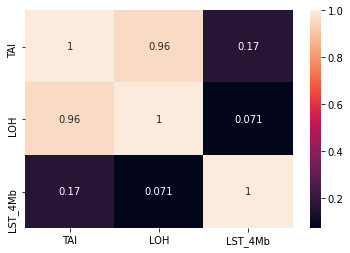

In [485]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_4Mb']].corr(), annot=True)

<AxesSubplot:>

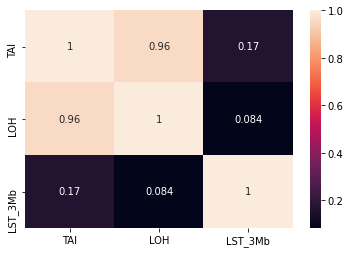

In [486]:
sns.heatmap(results_inform.loc[:, ['TAI', 'LOH', 'LST_3Mb']].corr(), annot=True)

### 10% tumorov s najvyššou hodnotou HRD_11Mb

In [487]:
np.percentile(results_inform['HRD_11'], 90)

28.200000000000003

In [488]:
inform_top_10 = get_quantile(results_inform, 'HRD_11', 0.9)

inform_top_10

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,89,72,60,51,43,40,36,33,29,38,42,45,49,52,60,69,81,98,14.0,unknown,positive,1.0,NaN
25,P22/P22.I044.004.WGS_events.txt,P22/P22.I044.004.WGS.Source.vcf.gz,I044_004_2M1_D1,0.990309,4,5,70,55,52,42,36,34,31,26,23,32,35,40,43,45,51,61,64,79,18.0,unknown,negative,0.0,NaN
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,47,59,75,114,167,14.0,stable,positive,1.0,1.0


### 10% tumorov s najvyššou hodnotou HRD_10Mb

In [489]:
np.percentile(results_inform['HRD_10'], 90)

33.400000000000006

In [490]:
inform_top_10 = get_quantile(results_inform, 'HRD_10', 0.9)

inform_top_10

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric,Response - real numeric
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0,0.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0,1.0
21,P18/P18.I062_021.WGS_events.txt,P18/P18.I062.021.WGS.Source.vcf.gz,I0622_021.T,1.075633,0,0,150,113,87,61,51,48,41,36,27,27,36,41,48,51,61,87,113,150,16.0,unknown,positive,1.0,NaN
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,89,72,60,51,43,40,36,33,29,38,42,45,49,52,60,69,81,98,14.0,unknown,positive,1.0,NaN
25,P22/P22.I044.004.WGS_events.txt,P22/P22.I044.004.WGS.Source.vcf.gz,I044_004_2M1_D1,0.990309,4,5,70,55,52,42,36,34,31,26,23,32,35,40,43,45,51,61,64,79,18.0,unknown,negative,0.0,NaN
